# LDSA CAPSTONE PROJECT | EXPLORATORY DATA ANALYSIS

In [1]:
#!pip install sweetviz

## 1. IMPORT MODULES

In [41]:
import os
import pandas as pd
import numpy as np
import sweetviz
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency

# Set the option to display all columns (None means no limit)
pd.set_option('display.max_columns', None)

# Optionally, adjust the maximum number of rows to display as well
#pd.set_option('display.max_rows', None)

## 2. Load Data

In [3]:
def load_data(file):
    df = pd.read_csv(os.path.join("data", file), parse_dates=['dob', 'c_jail_in', 'c_jail_out',
                                                              'c_offense_date', 'c_arrest_date',
                                                              'compas_screening_date', 'vr_offense_date',
                                                              'vr_offense_date'])
    return df
data = load_data("two-years-recid.csv")
data.head()


id               name     sex        dob  age              race  \
0   1         steven lux    Male 1953-06-15   62         Caucasian   
1   2        andre small    Male 1987-10-01   28  African-American   
2   3        willie gray    Male 1959-01-12   57  African-American   
3   4  nickson marcellus    Male 1996-07-11   19  African-American   
4   5      patria barnes  Female 1978-06-06   37             Other   

            c_jail_in          c_jail_out  c_case_number c_offense_date  \
0 2013-01-05 04:35:31 2013-01-07 03:18:03  13000208CF10A     2013-01-05   
1 2013-04-02 12:18:46 2013-04-04 07:54:22  13006354MM10A     2013-04-02   
2 2014-10-31 12:02:01 2014-10-31 01:47:05  14040148MU10A     2014-10-30   
3 2014-01-23 03:19:30 2014-01-23 01:04:34  13017969CF10A            NaT   
4 2013-12-08 01:55:28 2013-12-09 02:00:59  13022717MM10A     2013-12-07   

  c_arrest_date c_charge_degree                   c_charge_desc  \
0           NaT               F              False Imprisonment   
1           NaT               M                         Battery   
2           NaT               M  DUI Level 0.15 Or Minor In Veh   
3    2014-01-23               F           arrest case no charge   
4           NaT               M                         Battery   

   juv_fel_count  juv_misd_count  juv_other_count  priors_count  \
0              0               0                0             0   
1              0               0                0             1   
2              0               0                0             8   
3              0               1                0             1   
4              0               0                0             0   

  compas_screening_date  type_of_assessment  decile_score score_text  \
0            2013-01-05  Risk of Recidivism             1        Low   
1            2013-04-03  Risk of Recidivism             3        Low   
2            2014-10-31  Risk of Recidivism             4        Low   
3            2014-01-23  Risk of Recidivism            10       High   
4            2013-12-09  Risk of Recidivism             1        Low   

  v_type_of_assessment  v_decile_score v_score_text  is_recid  r_case_number  \
0     Risk of Violence               1          Low         0            NaN   
1     Risk of Violence               3          Low         0            NaN   
2     Risk of Violence               2          Low         1  15043364TC20A   
3     Risk of Violence              10         High         1  16000241MM20A   
4     Risk of Violence               1          Low         0            NaN   

  r_offense_date r_charge_degree                      r_charge_desc  \
0            NaN             NaN                                NaN   
1            NaN             NaN                                NaN   
2     2015-07-23            (M2)          Driving License Suspended   
3     2016-01-04            (M1)  Possess Cannabis/20 Grams Or Less   
4            NaN             NaN                                NaN   

   is_violent_recid vr_case_number vr_offense_date vr_charge_degree  \
0                 0            NaN             NaT              NaN   
1                 0            NaN             NaT              NaN   
2                 0            NaN             NaT              NaN   
3                 0            NaN             NaT              NaN   
4                 0            NaN             NaT              NaN   

  vr_charge_desc  two_year_recid  
0            NaN               0  
1            NaN               0  
2            NaN               1  
3            NaN               1  
4            NaN               0

## 3. EDA | Exploratory Data Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6114 entries, 0 to 6113
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     6114 non-null   int64         
 1   name                   6114 non-null   object        
 2   sex                    6114 non-null   object        
 3   dob                    6114 non-null   datetime64[ns]
 4   age                    6114 non-null   int64         
 5   race                   6114 non-null   object        
 6   c_jail_in              5854 non-null   datetime64[ns]
 7   c_jail_out             5854 non-null   datetime64[ns]
 8   c_case_number          6096 non-null   object        
 9   c_offense_date         5155 non-null   datetime64[ns]
 10  c_arrest_date          941 non-null    datetime64[ns]
 11  c_charge_degree        6114 non-null   object        
 12  c_charge_desc          6090 non-null   object        
 13  juv

In [5]:
data.describe()

id                            dob          age  \
count  6114.000000                           6114  6114.000000   
mean   3057.500000  1981-01-17 06:22:15.426889088    34.757442   
min       1.000000            1919-10-14 00:00:00    18.000000   
25%    1529.250000            1973-07-10 00:00:00    25.000000   
50%    3057.500000            1984-06-02 00:00:00    31.000000   
75%    4585.750000            1990-06-20 18:00:00    42.000000   
max    6114.000000            1998-01-20 00:00:00    96.000000   
std    1765.104105                            NaN    11.802448   

                           c_jail_in                     c_jail_out  \
count                           5854                           5854   
mean   2013-09-26 05:58:52.477793024  2013-10-14 16:38:30.960368896   
min              2013-01-01 03:16:15            2013-01-02 01:12:01   
25%    2013-04-07 08:38:54.750000128            2013-04-24 02:28:23   
50%       2013-09-13 02:36:35.500000     2013-09-30 03:51:16.500000   
75%    2014-01-26 04:40:32.249999872  2014-02-09 01:47:06.249999872   
max              2016-03-11 10:26:16            2016-03-12 01:11:40   
std                              NaN                            NaN   

                      c_offense_date                  c_arrest_date  \
count                           5155                            941   
mean   2013-08-08 19:38:15.480116480  2013-04-26 23:24:48.204038144   
min              1987-11-07 00:00:00            1997-06-18 00:00:00   
25%              2013-03-21 00:00:00            2013-02-14 00:00:00   
50%              2013-08-25 00:00:00            2013-07-02 00:00:00   
75%              2014-01-13 00:00:00            2013-12-05 00:00:00   
max              2014-12-30 00:00:00            2014-12-27 00:00:00   
std                              NaN                            NaN   

       juv_fel_count  juv_misd_count  juv_other_count  priors_count  \
count    6114.000000     6114.000000      6114.000000   6114.000000   
mean        0.062643        0.090939         0.104351      3.438502   
min         0.000000        0.000000         0.000000      0.000000   
25%         0.000000        0.000000         0.000000      0.000000   
50%         0.000000        0.000000         0.000000      2.000000   
75%         0.000000        0.000000         0.000000      5.000000   
max        10.000000       13.000000         9.000000     38.000000   
std         0.396906        0.486264         0.448095      4.858464   

               compas_screening_date  decile_score  v_decile_score  \
count                           6114   6114.000000     6114.000000   
mean   2013-09-19 18:03:53.169774336      4.488878        3.688584   
min              2013-01-01 00:00:00      1.000000        1.000000   
25%              2013-04-05 00:00:00      2.000000        1.000000   
50%              2013-09-11 00:00:00      4.000000        3.000000   
75%              2014-01-23 00:00:00      7.000000        5.000000   
max              2014-12-31 00:00:00     10.000000       10.000000   
std                              NaN      2.849050        2.503754   

          is_recid  is_violent_recid                vr_offense_date  \
count  6114.000000       6114.000000                            694   
mean      0.479392          0.113510  2014-10-25 12:37:20.922190336   
min       0.000000          0.000000            2013-01-28 00:00:00   
25%       0.000000          0.000000            2014-03-27 00:00:00   
50%       0.000000          0.000000            2014-11-06 00:00:00   
75%       1.000000          0.000000            2015-06-23 00:00:00   
max       1.000000          1.000000            2016-03-13 00:00:00   
std       0.499616          0.317241                            NaN   

       two_year_recid  
count     6114.000000  
mean         0.450114  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          1.000000  
max          1.000000  
std          0.497546

In [6]:
df_report = sweetviz.DataframeReport(data)

                                             |          | [  0%]   00:00 -> (? left)


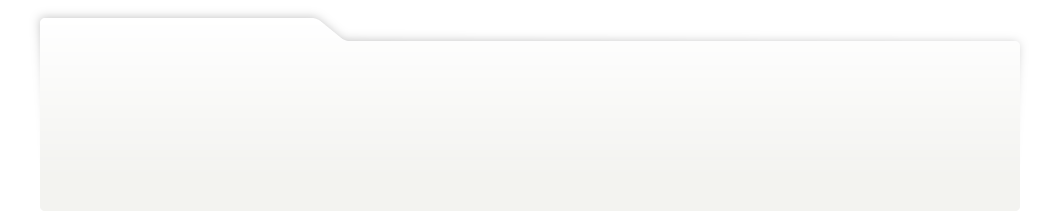
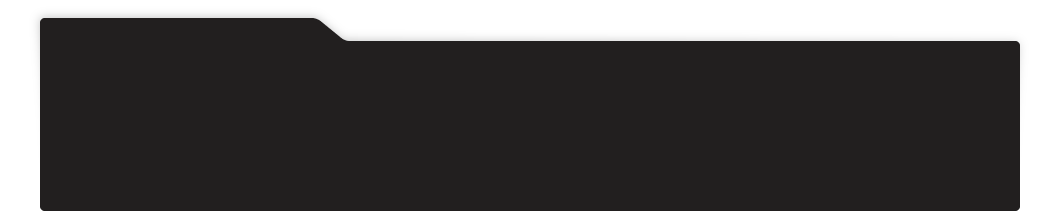
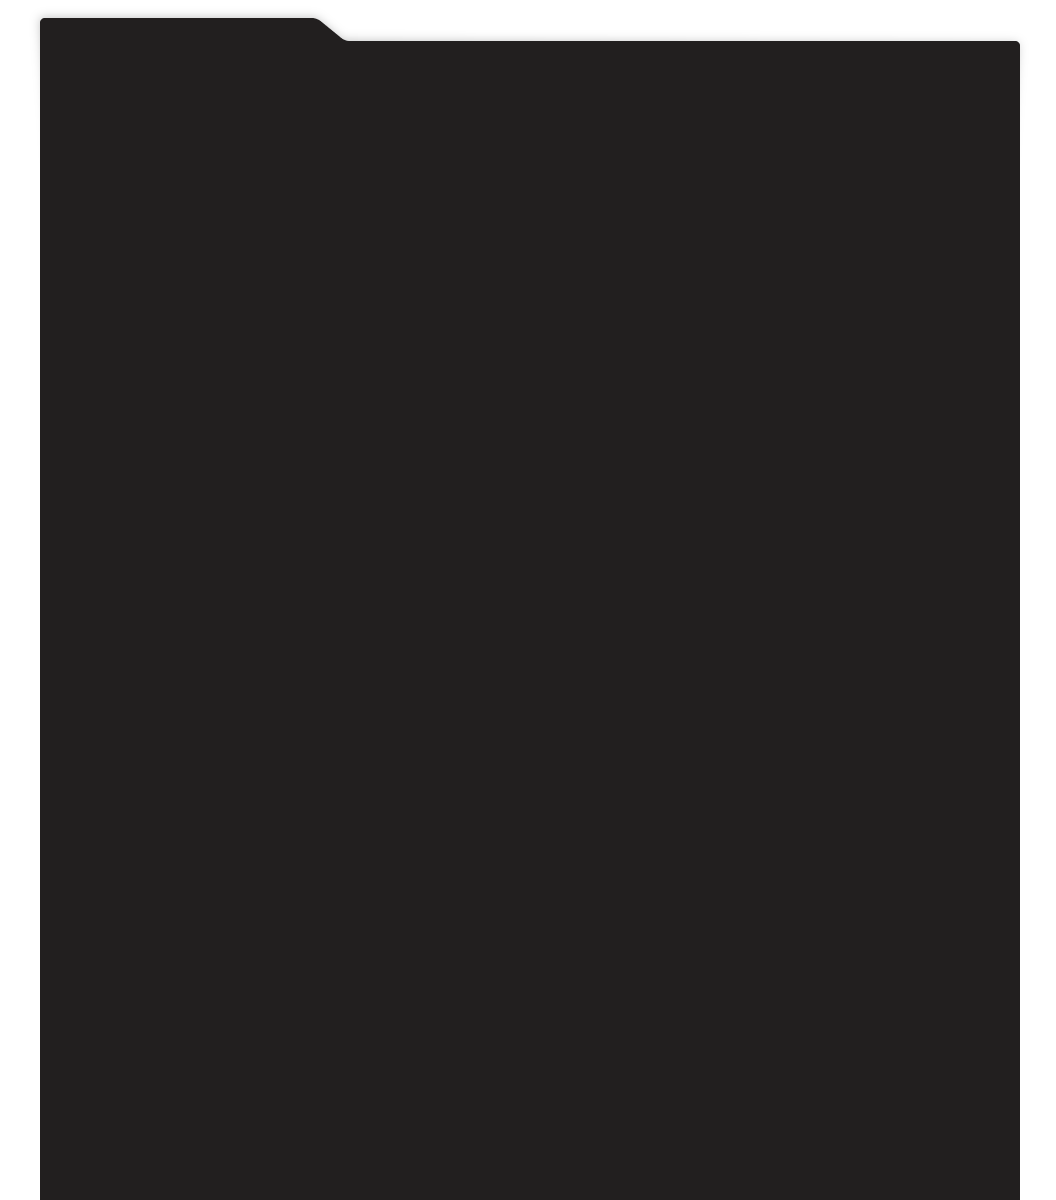
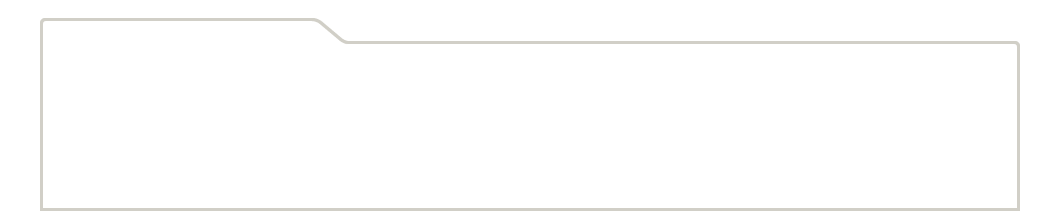
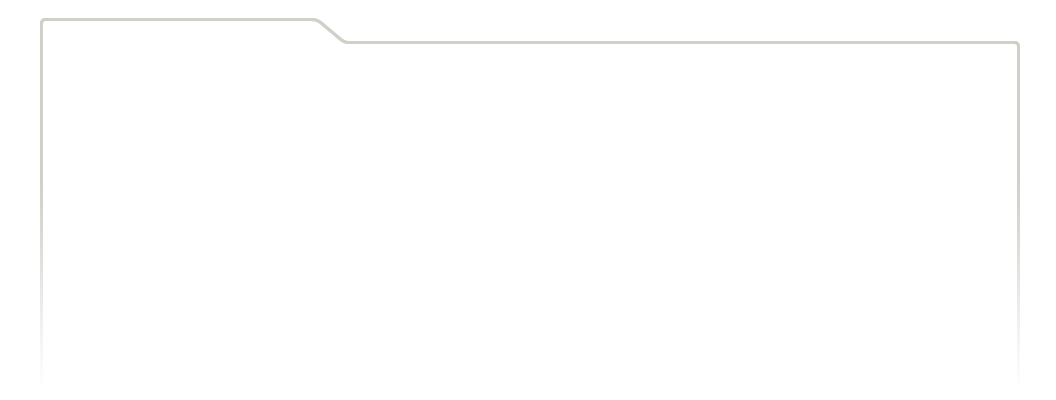
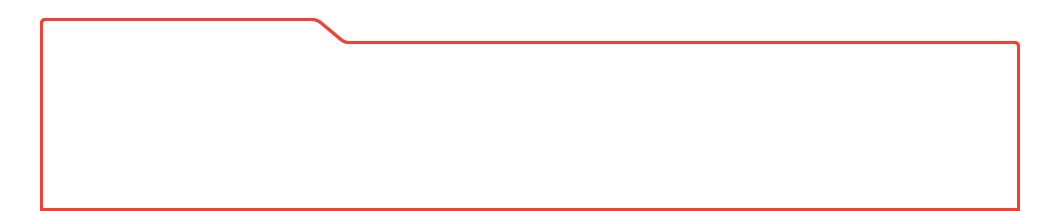
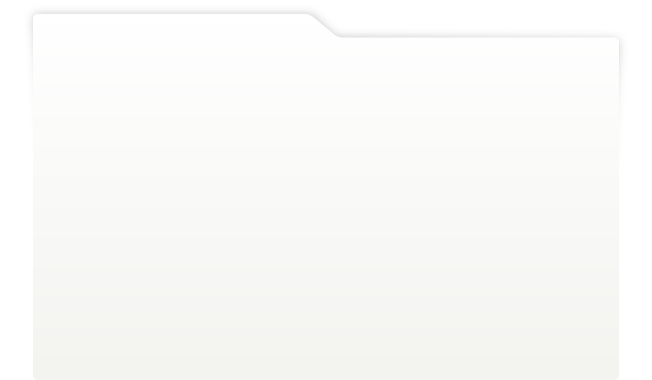
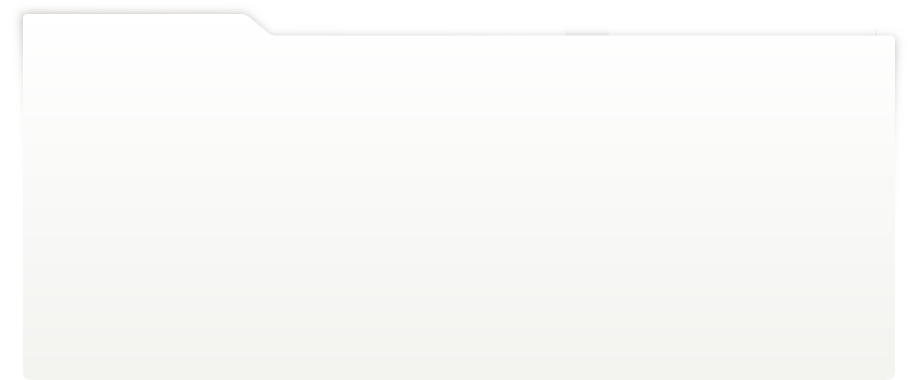
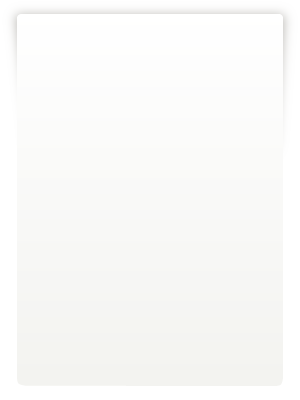
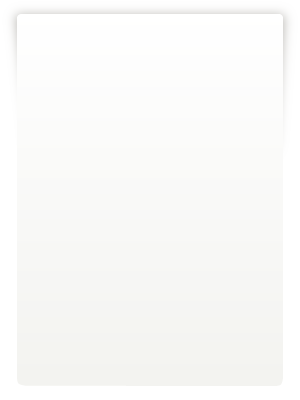
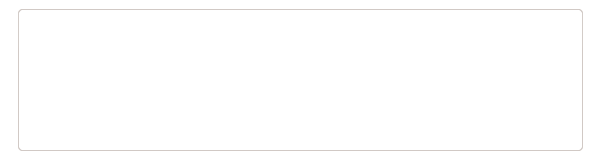
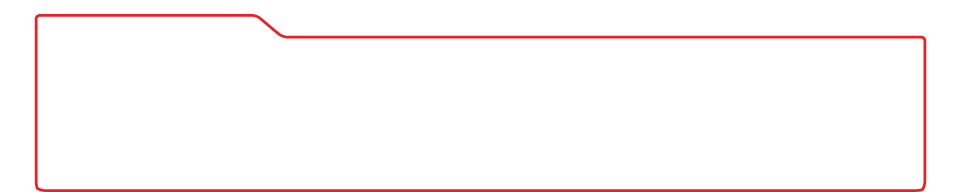
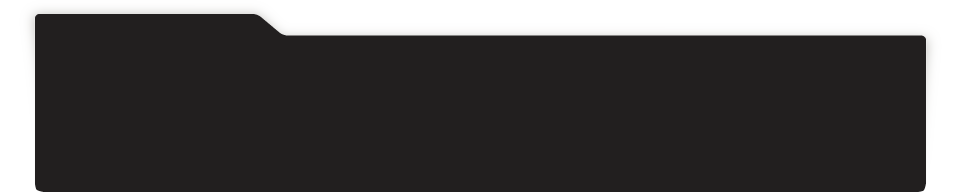
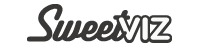
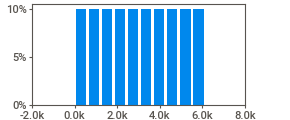
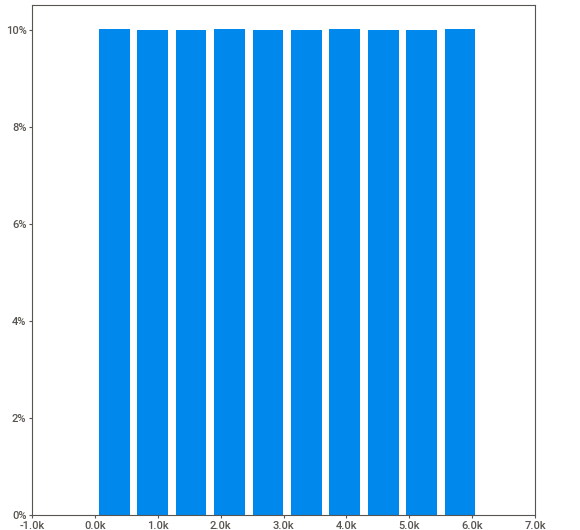
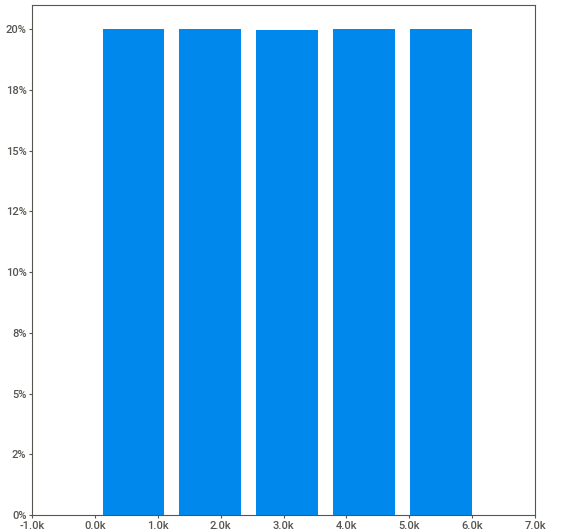
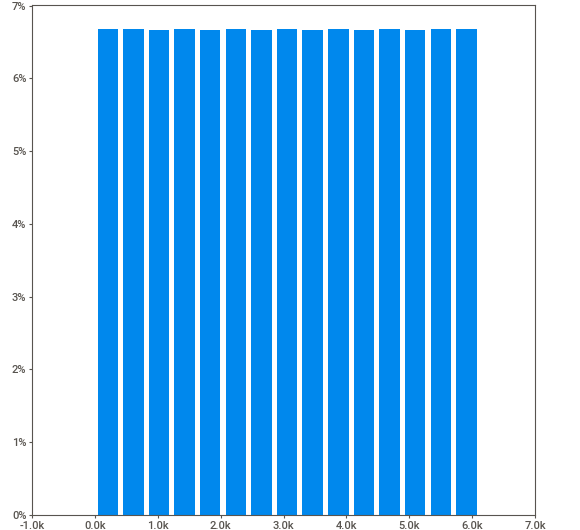
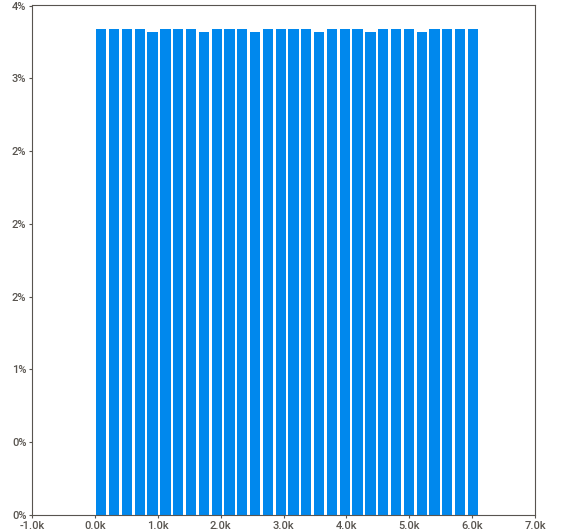
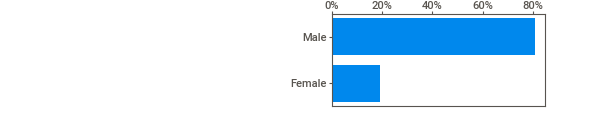
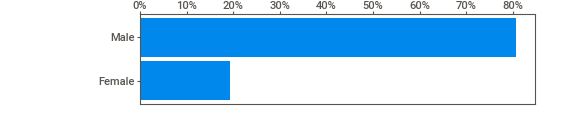
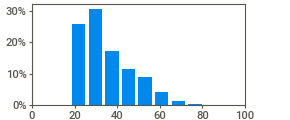
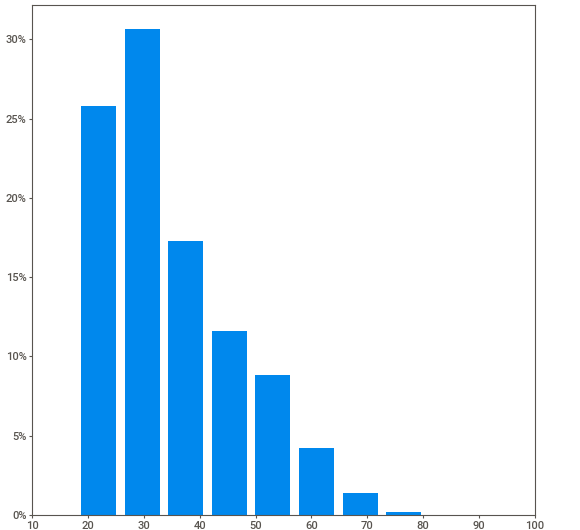
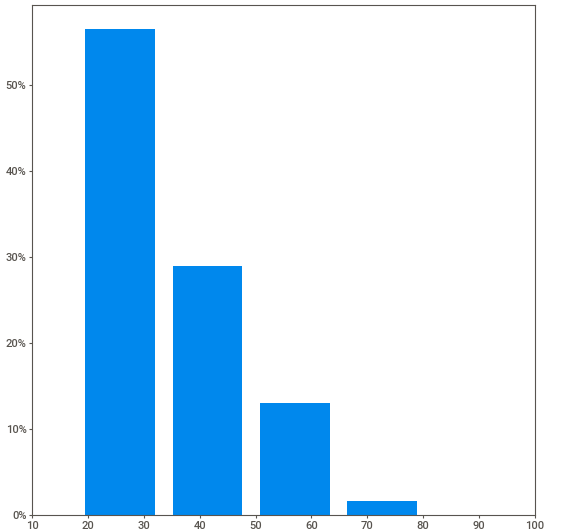
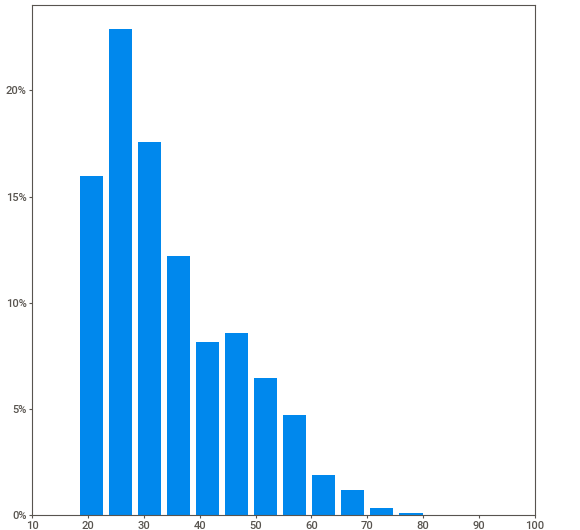
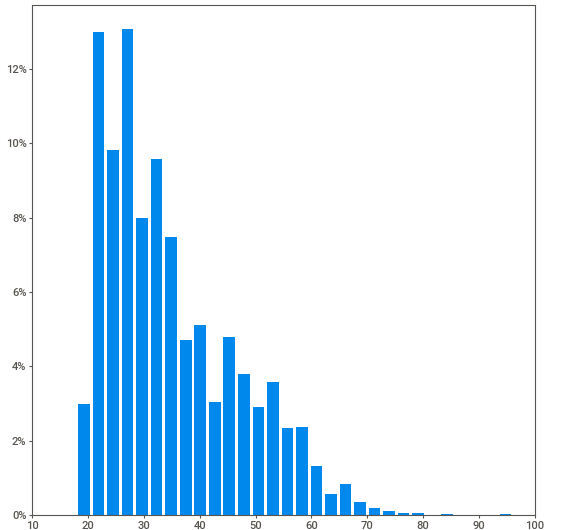
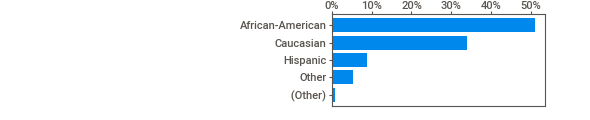
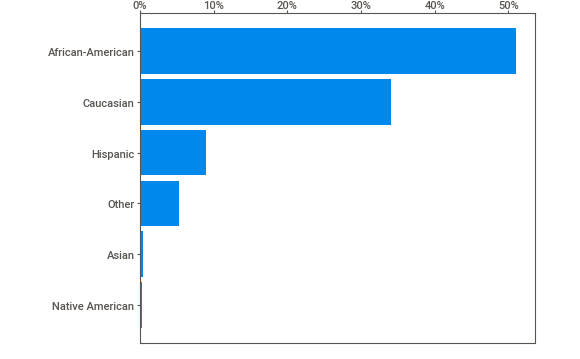
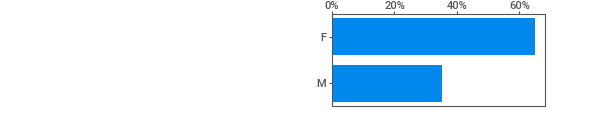
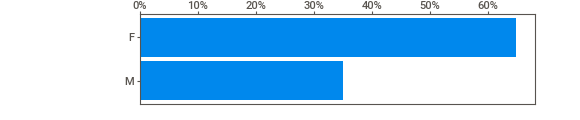
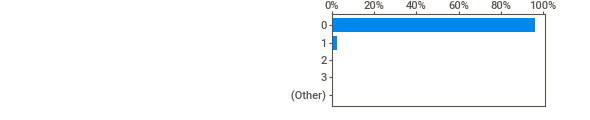
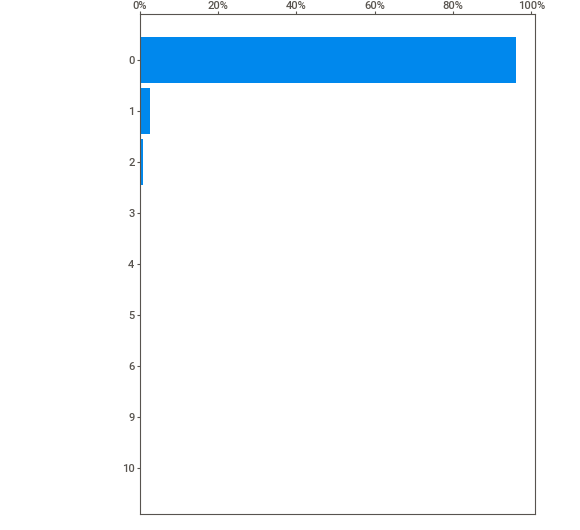
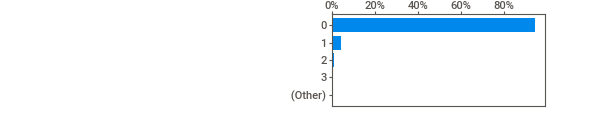
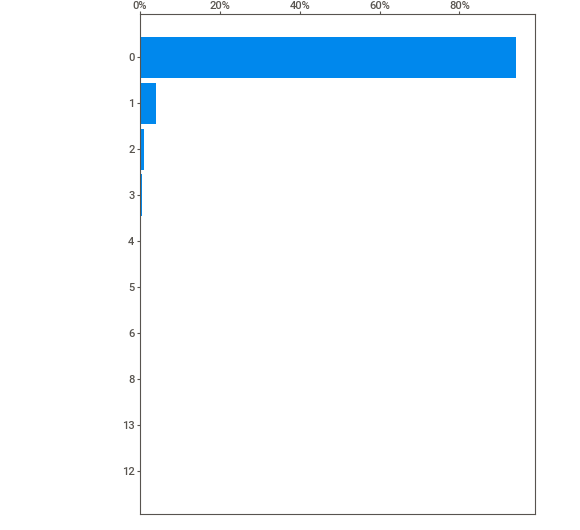
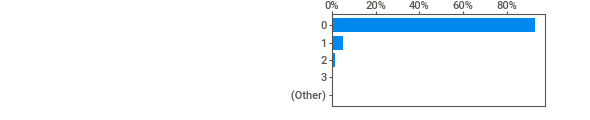
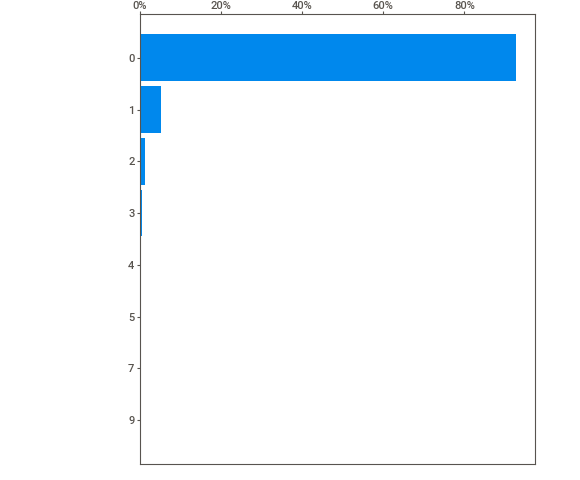
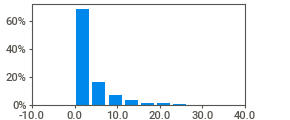
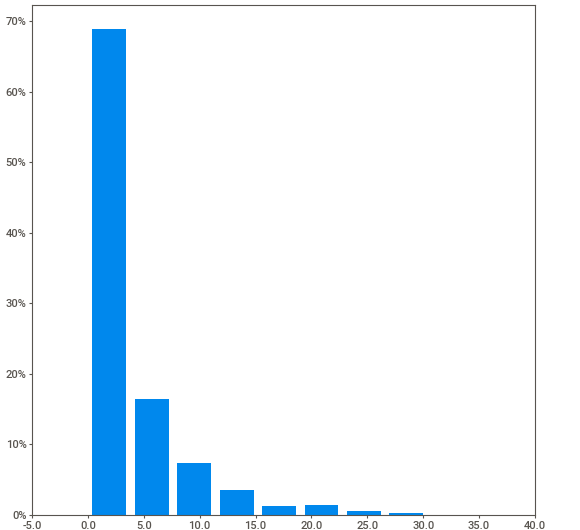
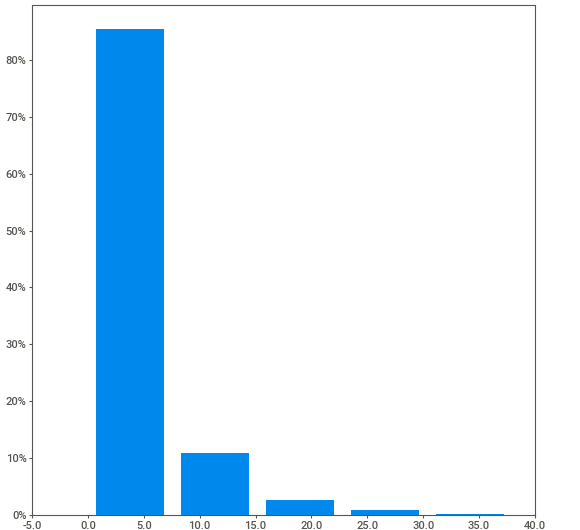
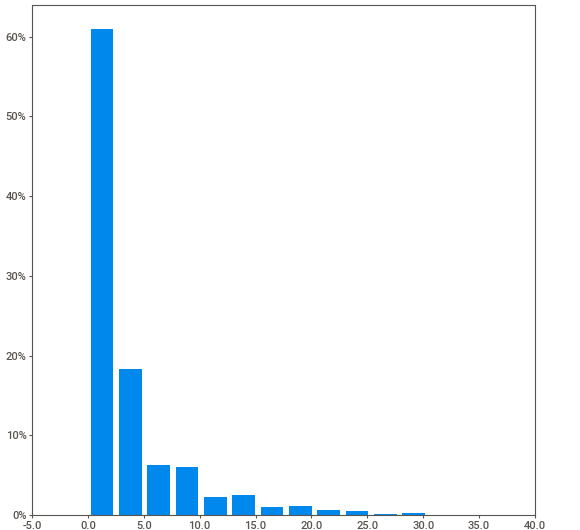
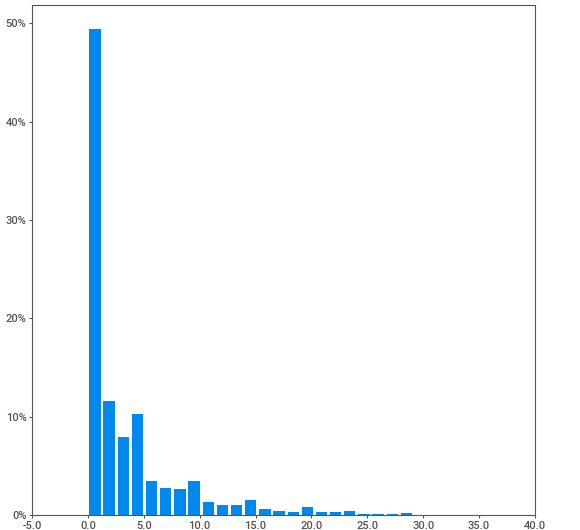
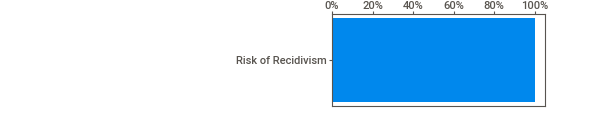
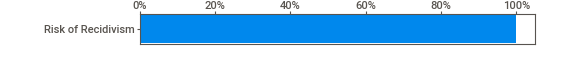
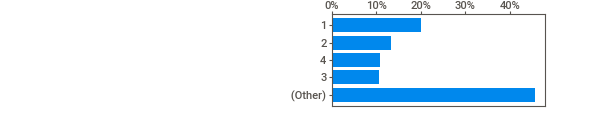
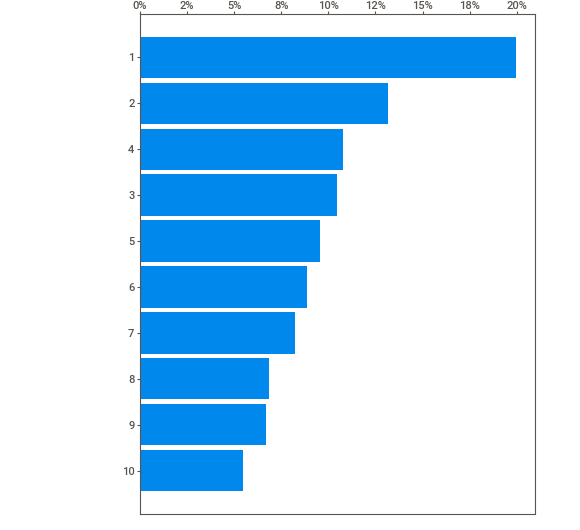
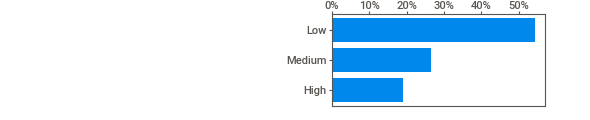
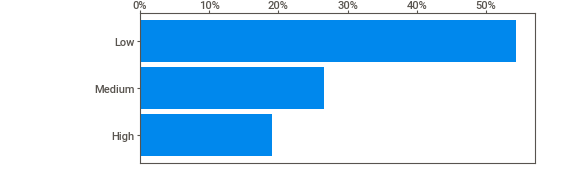
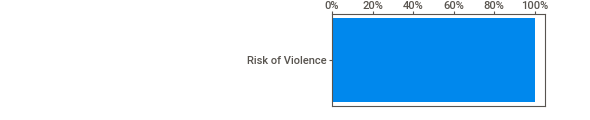
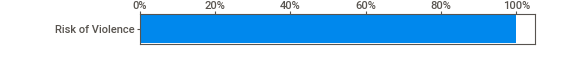
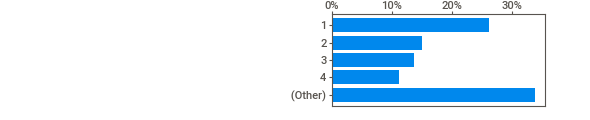
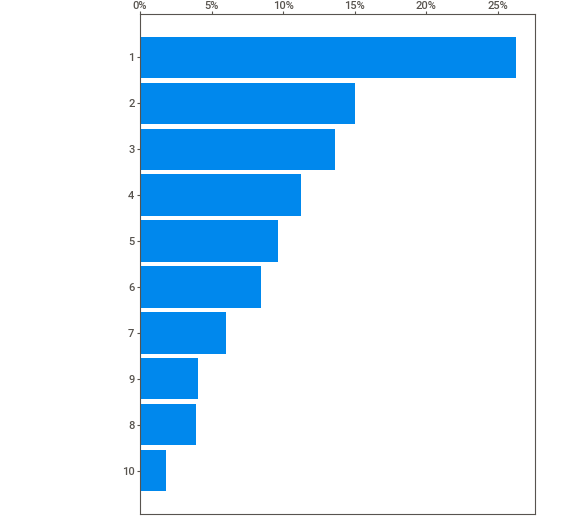
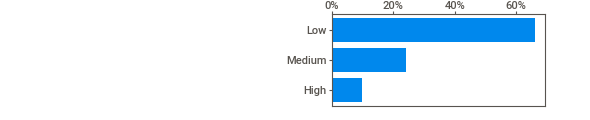
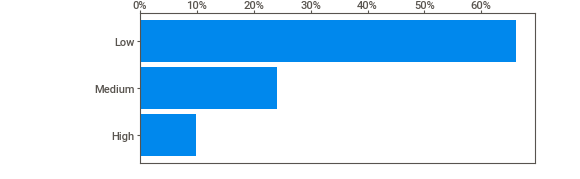
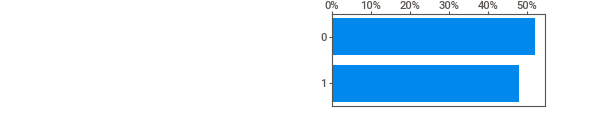
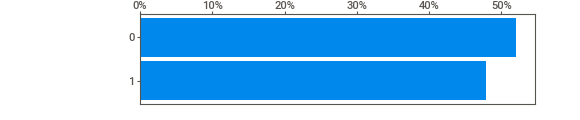
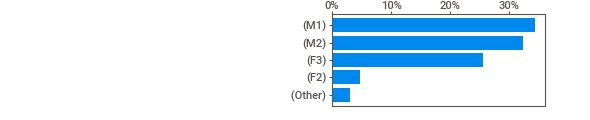
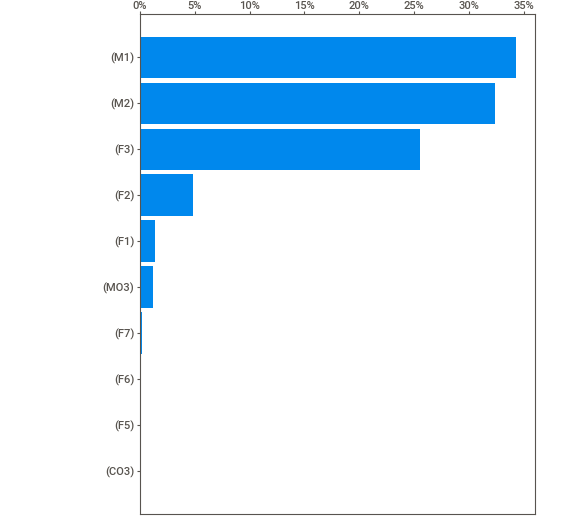
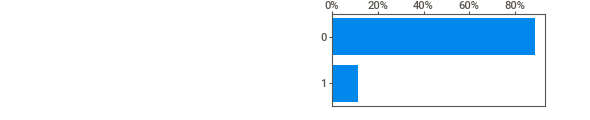
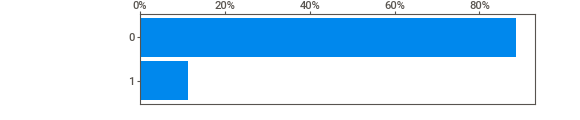
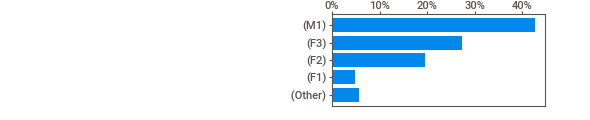
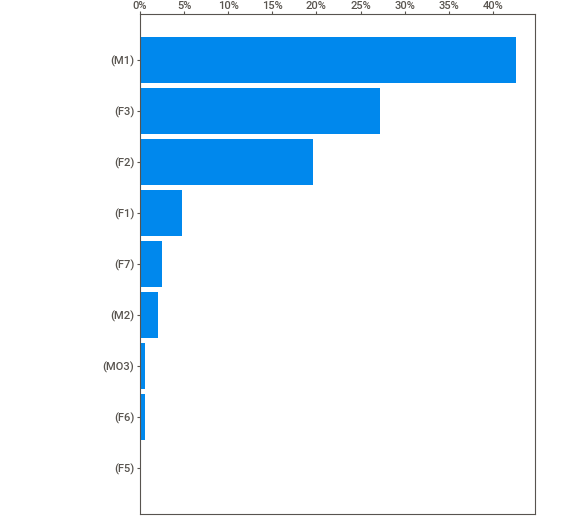
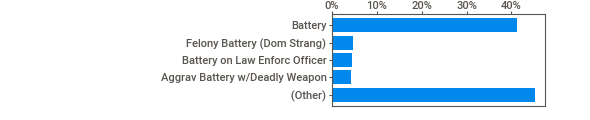
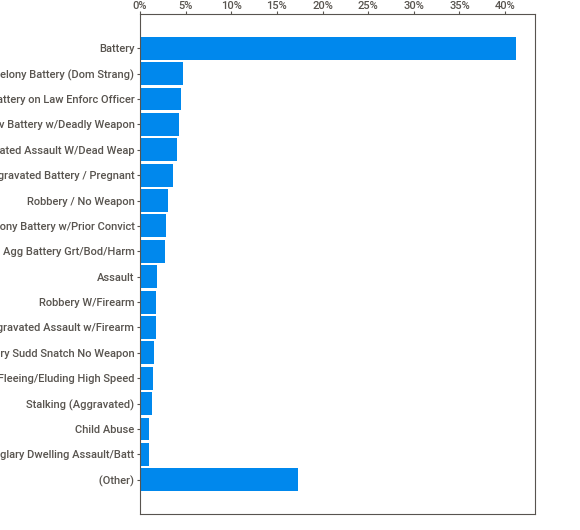
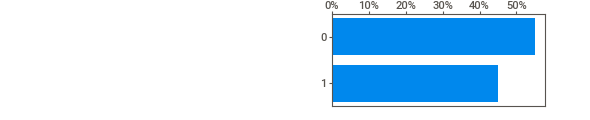
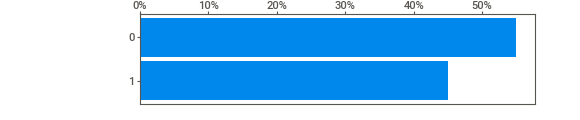
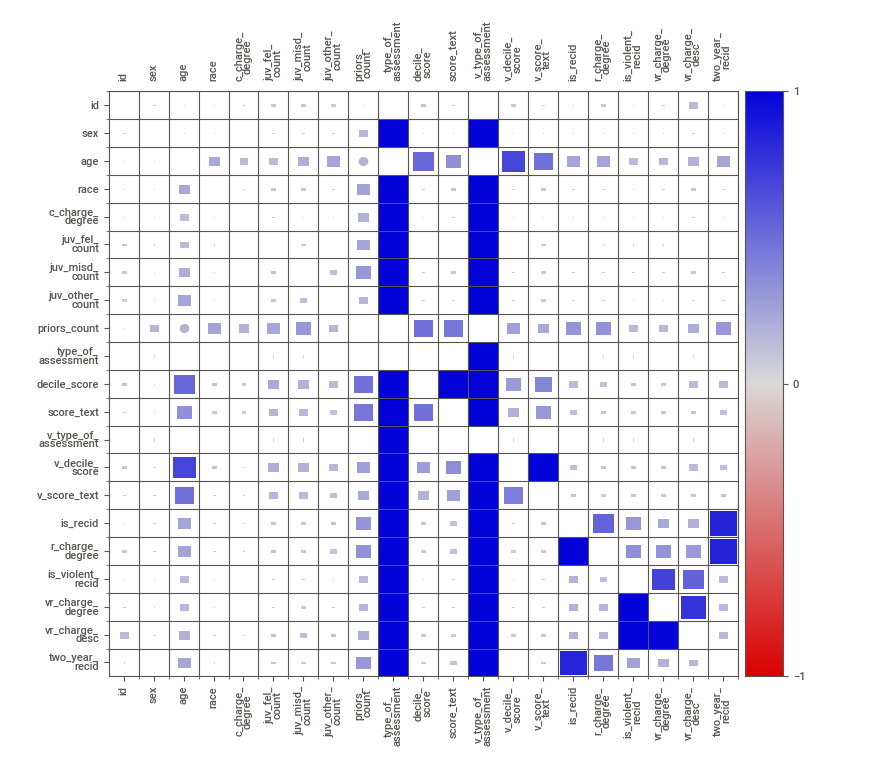
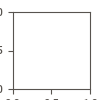

In [7]:
df_report.show_notebook()

In [8]:
df_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### 3.1 Feature Analysis

In [9]:
def analyze_dataset(df, target_columns):
    """
    Analyzes the dataset for key characteristics, including feature type, missing values, and target identification.

    Parameters:
    - df (pd.DataFrame): The dataset to analyze.
    - target_columns (list): A list of columns that represent targets.

    Returns:
    - pd.DataFrame: A DataFrame summarizing the analysis of each feature.
    """
    # Initialize the feature analysis dictionary
    feature_analysis = {
        'Feature': [],
        'Type': [],
        'Total Values': [],
        'Missing Values': [],
        'Unique Values (Categorical)': [],
        'Number of Unique Values (Categorical)': [],
        'Is Target': []
    }

    # Analyze each column
    for col in df.columns:
        feature_analysis['Feature'].append(col)
        feature_analysis['Total Values'].append(len(df[col]))
        feature_analysis['Missing Values'].append(df[col].isnull().sum())

        # Determine the variable type
        if pd.api.types.is_numeric_dtype(df[col]):
            feature_analysis['Type'].append('Numerical')
            feature_analysis['Unique Values (Categorical)'].append(None)
            feature_analysis['Number of Unique Values (Categorical)'].append('na')  # Append 'na' directly to the list
        else:
            feature_analysis['Type'].append('Categorical')
            unique_values_list = df[col].dropna().unique().tolist()
            feature_analysis['Unique Values (Categorical)'].append(unique_values_list)
            feature_analysis['Number of Unique Values (Categorical)'].append(len(unique_values_list))

        # Identify if the column is a feature or a target
        if col in target_columns:
            feature_analysis['Is Target'].append(True)
        else:
            feature_analysis['Is Target'].append(False)

    # Create a DataFrame from the analysis dictionary
    feature_analysis_df = pd.DataFrame(feature_analysis)

    return feature_analysis_df


In [10]:
# Define your target columns
target_columns = ['two_year_recid']

# Call the function
analysis_results = analyze_dataset(data, target_columns)
analysis_results

Feature         Type  Total Values  Missing Values  \
0                      id    Numerical          6114               0   
1                    name  Categorical          6114               0   
2                     sex  Categorical          6114               0   
3                     dob  Categorical          6114               0   
4                     age    Numerical          6114               0   
5                    race  Categorical          6114               0   
6               c_jail_in  Categorical          6114             260   
7              c_jail_out  Categorical          6114             260   
8           c_case_number  Categorical          6114              18   
9          c_offense_date  Categorical          6114             959   
10          c_arrest_date  Categorical          6114            5173   
11        c_charge_degree  Categorical          6114               0   
12          c_charge_desc  Categorical          6114              24   
13          juv_fel_count    Numerical          6114               0   
14         juv_misd_count    Numerical          6114               0   
15        juv_other_count    Numerical          6114               0   
16           priors_count    Numerical          6114               0   
17  compas_screening_date  Categorical          6114               0   
18     type_of_assessment  Categorical          6114               0   
19           decile_score    Numerical          6114               0   
20             score_text  Categorical          6114               0   
21   v_type_of_assessment  Categorical          6114               0   
22         v_decile_score    Numerical          6114               0   
23           v_score_text  Categorical          6114               0   
24               is_recid    Numerical          6114               0   
25          r_case_number  Categorical          6114            3183   
26         r_offense_date  Categorical          6114            3183   
27        r_charge_degree  Categorical          6114            3183   
28          r_charge_desc  Categorical          6114            3232   
29       is_violent_recid    Numerical          6114               0   
30         vr_case_number  Categorical          6114            5420   
31        vr_offense_date  Categorical          6114            5420   
32       vr_charge_degree  Categorical          6114            5420   
33         vr_charge_desc  Categorical          6114            5420   
34         two_year_recid    Numerical          6114               0   

                          Unique Values (Categorical)  \
0                                                None   
1   [steven lux, andre small, willie gray, nickson...   
2                                      [Male, Female]   
3   [1953-06-15 00:00:00, 1987-10-01 00:00:00, 195...   
4                                                None   
5   [Caucasian, African-American, Other, Hispanic,...   
6   [2013-01-05 04:35:31, 2013-04-02 12:18:46, 201...   
7   [2013-01-07 03:18:03, 2013-04-04 07:54:22, 201...   
8   [13000208CF10A, 13006354MM10A, 14040148MU10A, ...   
9   [2013-01-05 00:00:00, 2013-04-02 00:00:00, 201...   
10  [2014-01-23 00:00:00, 2013-10-10 00:00:00, 201...   
11                                             [F, M]   
12  [False Imprisonment, Battery, DUI Level 0.15 O...   
13                                               None   
14                                               None   
15                                               None   
16                                               None   
17  [2013-01-05 00:00:00, 2013-04-03 00:00:00, 201...   
18                               [Risk of Recidivism]   
19                                               None   
20                                [Low, High, Medium]   
21                                 [Risk of Violence]   
22                                               None   
23                                [Low, High, Medium]   


### Missing values in c_jail_in and c_jail_ou

In [11]:
# Find rows where 'c_jail_in' is missing
missing_in = data['c_jail_in'].isnull()

# Find rows where 'c_jail_out' is missing
missing_out = data['c_jail_out'].isnull()

# Check if missing values in 'c_jail_in' and 'c_jail_out' are in the same rows
same_missing_rows = missing_in & missing_out

# Count the number of rows where both are missing
count_same_missing = same_missing_rows.sum()

# Display the count
print(f"Number of rows with missing values in both 'c_jail_in' and 'c_jail_out': {count_same_missing}")


Number of rows with missing values in both 'c_jail_in' and 'c_jail_out': 260


### Rows with missing values in BOTH  c_offense_date and c_arrest_date the columns

In [12]:

# Assuming 'data' is your DataFrame
# Find rows where 'c_offense_date' is missing
missing_offense_date = data['c_offense_date'].isnull()

# Find rows where 'c_arrest_date' is missing
missing_arrest_date = data['c_arrest_date'].isnull()

# Check for any missing values in either column
any_missing = missing_offense_date | missing_arrest_date

# Count the number of rows with missing values in either column
count_any_missing = any_missing.sum()

# Display the count
print(f"Number of rows with missing values in 'c_offense_date' or 'c_arrest_date': {count_any_missing}")

# If you want to find rows where both columns are missing
both_missing = missing_offense_date & missing_arrest_date
count_both_missing = both_missing.sum()
print(f"Number of rows with missing values in both 'c_offense_date' and 'c_arrest_date': {count_both_missing}")


Number of rows with missing values in 'c_offense_date' or 'c_arrest_date': 6114
Number of rows with missing values in both 'c_offense_date' and 'c_arrest_date': 18


Are the rows with  both_missing values in c_offense_date and c_arrest_date the same as in the column c_case_number?

In [13]:
# Find rows where both 'c_offense_date' and 'c_arrest_date' are missing
missing_both_dates = data['c_offense_date'].isnull() & data['c_arrest_date'].isnull()

# Find rows where 'c_case_number' is missing
missing_case_number = data['c_case_number'].isnull()

# Check if the rows with missing dates are the same as the rows with missing case number
missing_values_case_number = analysis_results.loc[analysis_results['Feature'] == 'c_case_number', 'Missing Values'].values[0]
print(f"Missing case number rows: {missing_values_case_number}")


print(f"Number of rows where both dates and case number are missing: {count_same_missing}")

# Optional: Analyze if all rows that have missing both dates also have a missing case number
if missing_both_dates.equals(missing_case_number):
    print("All rows with missing dates also have a missing case number.")
else:
    print("Not all rows with missing dates have a missing case number.")

Missing case number rows: 18
Number of rows where both dates and case number are missing: 260
All rows with missing dates also have a missing case number.


In [14]:

# Find rows where 'c_case_number' is missing
missing_c_case = data['c_case_number'].isnull()

# Find rows where 'r_case_number' is missing
missing_r_case = data['r_case_number'].isnull()

# Find rows where 'vr_case_number' is missing
missing_vr_case = data['vr_case_number'].isnull()

# Check for missing values in 'r_case_number' where 'c_case_number' is missing
missing_in_r_when_c_missing = missing_r_case[missing_c_case]

# Check for missing values in 'vr_case_number' where 'c_case_number' is missing
missing_in_vr_when_c_missing = missing_vr_case[missing_c_case]

# Check for missing values in both 'r_case_number' and 'vr_case_number' where 'c_case_number' is missing
missing_in_both_when_c_missing = missing_r_case & missing_vr_case & missing_c_case

# Sum these conditions to get counts
count_missing_in_r_when_c_missing = missing_in_r_when_c_missing.sum()
count_missing_in_vr_when_c_missing = missing_in_vr_when_c_missing.sum()
count_missing_in_both_when_c_missing = missing_in_both_when_c_missing.sum()

# Output the results
print(f"Rows with missing 'c_case_number' also missing in 'r_case_number': {count_missing_in_r_when_c_missing}")
print(f"Rows with missing 'c_case_number' also missing in 'vr_case_number': {count_missing_in_vr_when_c_missing}")
print(f"Rows with missing 'c_case_number' also missing in both 'r_case_number' and 'vr_case_number': {count_missing_in_both_when_c_missing}")


Rows with missing 'c_case_number' also missing in 'r_case_number': 3
Rows with missing 'c_case_number' also missing in 'vr_case_number': 14
Rows with missing 'c_case_number' also missing in both 'r_case_number' and 'vr_case_number': 3


## Duplicated rows

In [15]:


# 1. Total number of duplicated rows in the DataFrame
total_duplicated_rows = data.duplicated().sum()

# 2. Number of rows that have duplicated values in 'c_case_number'
duplicated_c_case_number = data.duplicated(subset=['c_case_number']).sum()
# 3. Number of rows that have duplicated values in 'r_case_number'
duplicated_r_case_number = data.duplicated(subset=['r_case_number']).sum()
# 4. Number of rows that have duplicated values in 'vr_case_number'
duplicated_vr_case_number = data.duplicated(subset=['vr_case_number']).sum()

# 5. Number of rows that have duplicated values in 'c_case_number' and 'r_case_number'
duplicated_c_r_case_number = data.duplicated(subset=['c_case_number', 'r_case_number']).sum()

# 6. Number of rows that have duplicated values in 'c_case_number' and 'vr_case_number'
duplicated_c_v_case_number = data.duplicated(subset=['c_case_number', 'vr_case_number']).sum()

# 6. Number of rows that have duplicated values in 'r_case_number' and 'vr_case_number'
duplicated_r_v_case_number = data.duplicated(subset=['r_case_number', 'vr_case_number']).sum()

# 8. Number of rows that have duplicated values in 'c_case_number', 'r_case_number', and 'vr_case_number'
duplicated_c_r_vr_case_number = data.duplicated(subset=['c_case_number', 'r_case_number', 'vr_case_number']).sum()

# Output the results
print(f"Total number of duplicated rows in the DataFrame: {total_duplicated_rows}")
print(f"Number of rows with duplicated 'c_case_number': {duplicated_c_case_number}")
print(f"Number of rows with duplicated 'r_case_number': {duplicated_r_case_number}")
print(f"Number of rows with duplicated 'vr_case_number': {duplicated_vr_case_number}")

print(f"Number of rows with duplicated 'c_case_number' and 'vr_case_number': {duplicated_c_v_case_number}")
print(f"Number of rows with duplicated 'r_case_number' and 'vr_case_number'': {duplicated_r_v_case_number}")

print(f"Number of rows with duplicated 'c_case_number' and 'r_case_number': {duplicated_c_r_case_number}")
print(f"Number of rows with duplicated 'c_case_number', 'r_case_number', and 'vr_case_number': {duplicated_c_r_vr_case_number}")


Total number of duplicated rows in the DataFrame: 0
Number of rows with duplicated 'c_case_number': 17
Number of rows with duplicated 'r_case_number': 3182
Number of rows with duplicated 'vr_case_number': 5419
Number of rows with duplicated 'c_case_number' and 'vr_case_number': 13
Number of rows with duplicated 'r_case_number' and 'vr_case_number'': 3182
Number of rows with duplicated 'c_case_number' and 'r_case_number': 2
Number of rows with duplicated 'c_case_number', 'r_case_number', and 'vr_case_number': 2


In [16]:


# Find duplicated rows based on 'c_case_number' and display the first 10
duplicates_c_case_number = data[data.duplicated(subset=['c_case_number'], keep=False)]
print("Duplicated based on 'c_case_number':")
print(duplicates_c_case_number.head(10))

# Find duplicated rows based on 'r_case_number' and display the first 10
duplicates_r_case_number = data[data.duplicated(subset=['r_case_number'], keep=False)]
print("Duplicated based on 'r_case_number':")
print(duplicates_r_case_number.head(10))

# Find duplicated rows based on 'vr_case_number' and display the first 10
duplicates_vr_case_number = data[data.duplicated(subset=['vr_case_number'], keep=False)]
print("Duplicated based on 'vr_case_number':")
print(duplicates_vr_case_number.head(10))

# Find duplicated rows based on both 'c_case_number' and 'vr_case_number' and display the first 10
duplicates_c_vr_case_number = data[data.duplicated(subset=['c_case_number', 'vr_case_number'], keep=False)]
print("Duplicated based on 'c_case_number' and 'vr_case_number':")
print(duplicates_c_vr_case_number.head(10))

# Find duplicated rows based on both 'r_case_number' and 'vr_case_number' and display the first 10
duplicates_r_vr_case_number = data[data.duplicated(subset=['r_case_number', 'vr_case_number'], keep=False)]
print("Duplicated based on 'r_case_number' and 'vr_case_number':")
print(duplicates_r_vr_case_number.head(10))

# Find duplicated rows based on both 'c_case_number' and 'r_case_number' and display the first 10
duplicates_c_r_case_number = data[data.duplicated(subset=['c_case_number', 'r_case_number'], keep=False)]
print("Duplicated based on 'c_case_number' and 'r_case_number':")
print(duplicates_c_r_case_number.head(10))

# Find duplicated rows based on 'c_case_number', 'r_case_number', and 'vr_case_number' and display the first 10
duplicates_c_r_vr_case_number = data[data.duplicated(subset=['c_case_number', 'r_case_number', 'vr_case_number'], keep=False)]
print("Duplicated based on 'c_case_number', 'r_case_number', and 'vr_case_number':")
print(duplicates_c_r_vr_case_number.head(10))


Duplicated based on 'c_case_number':
        id                   name     sex        dob  age              race  \
127    128           tyra vanzant  Female 1985-10-26   30         Caucasian   
1467  1468           tracy parker    Male 1965-11-07   50  African-American   
1638  1639            yurek gorny    Male 1991-07-16   24         Caucasian   
2215  2216          fredrick hill    Male 1970-06-18   45  African-American   
2360  2361         debrcca ridges  Female 1974-01-20   42  African-American   
2477  2478    raul casanova-costa    Male 1971-08-18   44          Hispanic   
2545  2546          brian quirama    Male 1994-10-06   21          Hispanic   
2737  2738      rosario pennachio    Male 1979-09-30   36         Caucasian   
3010  3011        david tal-mason    Male 1958-12-14   57         Caucasian   
3050  3051  carlos santiago-ortiz    Male 1948-08-21   67          Hispanic   

     c_jail_in c_jail_out c_case_number c_offense_date c_arrest_date  \
127        NaT       

In [17]:
import pandas as pd

# Assuming 'data' is your DataFrame

# Define helper function to calculate the number of NaNs within duplicates
def count_nans_in_duplicates(df, subset):
    # Find all duplicates in the subset
    duplicates = df[df.duplicated(subset=subset, keep=False)]
    # Check for NaNs in these duplicates and sum them
    nans_in_duplicates = duplicates[subset].isna().any(axis=1).sum()
    return nans_in_duplicates

# Check for NaNs within duplicates based on different column combinations
nan_in_dup_c_case_number = count_nans_in_duplicates(data, ['c_case_number'])
nan_in_dup_r_case_number = count_nans_in_duplicates(data, ['r_case_number'])
nan_in_dup_vr_case_number = count_nans_in_duplicates(data, ['vr_case_number'])
nan_in_dup_c_r_case_number = count_nans_in_duplicates(data, ['c_case_number', 'r_case_number'])
nan_in_dup_c_v_case_number = count_nans_in_duplicates(data, ['c_case_number', 'vr_case_number'])
nan_in_dup_r_v_case_number = count_nans_in_duplicates(data, ['r_case_number', 'vr_case_number'])
nan_in_dup_c_r_vr_case_number = count_nans_in_duplicates(data, ['c_case_number', 'r_case_number', 'vr_case_number'])

# Output the results
print(f"Number of NaNs within duplicates for 'c_case_number': {nan_in_dup_c_case_number}")
print(f"Number of NaNs within duplicates for 'r_case_number': {nan_in_dup_r_case_number}")
print(f"Number of NaNs within duplicates for 'vr_case_number': {nan_in_dup_vr_case_number}")
print(f"Number of NaNs within duplicates for 'c_case_number' and 'r_case_number': {nan_in_dup_c_r_case_number}")
print(f"Number of NaNs within duplicates for 'c_case_number' and 'vr_case_number': {nan_in_dup_c_v_case_number}")
print(f"Number of NaNs within duplicates for 'r_case_number' and 'vr_case_number': {nan_in_dup_r_v_case_number}")
print(f"Number of NaNs within duplicates for 'c_case_number', 'r_case_number', and 'vr_case_number': {nan_in_dup_c_r_vr_case_number}")


Number of NaNs within duplicates for 'c_case_number': 18
Number of NaNs within duplicates for 'r_case_number': 3183
Number of NaNs within duplicates for 'vr_case_number': 5420
Number of NaNs within duplicates for 'c_case_number' and 'r_case_number': 3
Number of NaNs within duplicates for 'c_case_number' and 'vr_case_number': 14
Number of NaNs within duplicates for 'r_case_number' and 'vr_case_number': 3183
Number of NaNs within duplicates for 'c_case_number', 'r_case_number', and 'vr_case_number': 3


In [18]:

# Define helper function to calculate the number of NaNs within duplicates and return non-NaN duplicates if asked
def analyze_nans_in_duplicates(df, subset):
    # Find all duplicates in the subset
    duplicates = df[df.duplicated(subset=subset, keep=False)]
    # Check for NaNs in these duplicates and sum them
    nans_in_duplicates = duplicates[subset].isna().any(axis=1).sum()
    total_duplicates = len(duplicates)

    # Check if the number of rows with NaNs matches the total number of duplicates
    if nans_in_duplicates != total_duplicates:
        # Filter out rows that do not contain NaNs across the subset
        no_nans_duplicates = duplicates[~duplicates[subset].isna().any(axis=1)]
        return nans_in_duplicates, total_duplicates, no_nans_duplicates
    return nans_in_duplicates, total_duplicates, None

# Define subsets for which to perform the checks
subsets = {
    'c_case_number': ['c_case_number'],
    'r_case_number': ['r_case_number'],
    'vr_case_number': ['vr_case_number'],
    'c_case_number_r_case_number': ['c_case_number', 'r_case_number'],
    'c_case_number_vr_case_number': ['c_case_number', 'vr_case_number'],
    'r_case_number_vr_case_number': ['r_case_number', 'vr_case_number'],
    'c_r_v_case_number': ['c_case_number', 'r_case_number', 'vr_case_number']
}

# Iterate over subsets and perform analysis
for key, subset in subsets.items():
    nans, totals, non_nan_rows = analyze_nans_in_duplicates(data, subset)
    print(f"{key} - Number of NaNs within duplicates: {nans}, Total duplicates: {totals}")
    if non_nan_rows is not None:
        print(f"{key} - Rows without NaNs in duplicates:")
        print(non_nan_rows.head())  # Display only the head to avoid too much output
    else:
        print(f"{key} - All duplicated rows contain NaNs.")


c_case_number - Number of NaNs within duplicates: 18, Total duplicates: 18
c_case_number - All duplicated rows contain NaNs.
r_case_number - Number of NaNs within duplicates: 3183, Total duplicates: 3183
r_case_number - All duplicated rows contain NaNs.
vr_case_number - Number of NaNs within duplicates: 5420, Total duplicates: 5420
vr_case_number - All duplicated rows contain NaNs.
c_case_number_r_case_number - Number of NaNs within duplicates: 3, Total duplicates: 3
c_case_number_r_case_number - All duplicated rows contain NaNs.
c_case_number_vr_case_number - Number of NaNs within duplicates: 14, Total duplicates: 14
c_case_number_vr_case_number - All duplicated rows contain NaNs.
r_case_number_vr_case_number - Number of NaNs within duplicates: 3183, Total duplicates: 3183
r_case_number_vr_case_number - All duplicated rows contain NaNs.
c_r_v_case_number - Number of NaNs within duplicates: 3, Total duplicates: 3
c_r_v_case_number - All duplicated rows contain NaNs.


In [19]:
# Find all duplicates in 'c_case_number'
duplicates_c_case_number = data[data.duplicated(subset=['c_case_number'], keep=False)]

# Filter to keep only those where there are no NaNs in 'r_case_number' and 'vr_case_number'
no_nans_in_r_vr = duplicates_c_case_number[~duplicates_c_case_number['r_case_number'].isna() & ~duplicates_c_case_number['vr_case_number'].isna()]


# Filter to keep only those where there are no NaNs in either 'r_case_number' or 'vr_case_number'
no_nans_in_r_or_vr = duplicates_c_case_number[
    ~duplicates_c_case_number['r_case_number'].isna() | ~duplicates_c_case_number['vr_case_number'].isna()]

# Display the specific rows
print("Rows duplicated on 'c_case_number' without NaNs in 'r_case_number' and 'vr_case_number':")
print(no_nans_in_r_vr)

print("Rows duplicated on 'c_case_number' without NaNs in either 'r_case_number' or 'vr_case_number':")
print(no_nans_in_r_or_vr)

# Provide the count of these rows
count_no_nans_in_r_or_vr = no_nans_in_r_or_vr.shape[0]
print(f"Number of rows: {count_no_nans_in_r_or_vr}")


Rows duplicated on 'c_case_number' without NaNs in 'r_case_number' and 'vr_case_number':
        id                   name   sex        dob  age              race  \
2215  2216          fredrick hill  Male 1970-06-18   45  African-American   
2477  2478    raul casanova-costa  Male 1971-08-18   44          Hispanic   
3010  3011        david tal-mason  Male 1958-12-14   57         Caucasian   
3050  3051  carlos santiago-ortiz  Male 1948-08-21   67          Hispanic   

     c_jail_in c_jail_out c_case_number c_offense_date c_arrest_date  \
2215       NaT        NaT           NaN            NaT           NaT   
2477       NaT        NaT           NaN            NaT           NaT   
3010       NaT        NaT           NaN            NaT           NaT   
3050       NaT        NaT           NaN            NaT           NaT   

     c_charge_degree c_charge_desc  juv_fel_count  juv_misd_count  \
2215               M           NaN              0               0   
2477               M      

In [20]:
## NAN in c_case_number but have values in r_case_number and vr_case_number

In [21]:
import pandas as pd

# Assuming 'data' is your DataFrame

# Condition a: NaN in c_case_number but not in r_case_number
condition_a = data['c_case_number'].isna() & data['r_case_number'].notna()
rows_a = data[condition_a]
count_a = len(rows_a)

# Condition b: NaN in c_case_number but not in vr_case_number
condition_b = data['c_case_number'].isna() & data['vr_case_number'].notna()
rows_b = data[condition_b]
count_b = len(rows_b)

# Condition c: NaN in c_case_number but not in either r_case_number or vr_case_number
condition_c = data['c_case_number'].isna() & (data['r_case_number'].notna() | data['vr_case_number'].notna())
rows_c = data[condition_c]
count_c = len(rows_c)

# Condition d: NaN in c_case_number but not in both r_case_number and vr_case_number
condition_d = data['c_case_number'].isna() & data['r_case_number'].notna() & data['vr_case_number'].notna()
rows_d = data[condition_d]
count_d = len(rows_d)

# Print the number of rows for each condition
print(f"Number of rows with NaN in 'c_case_number' but not in 'r_case_number': {count_a}")
print(f"Number of rows with NaN in 'c_case_number' but not in 'vr_case_number': {count_b}")
print(f"Number of rows with NaN in 'c_case_number' and not in either 'r_case_number' or 'vr_case_number': {count_c}")
print(f"Number of rows with NaN in 'c_case_number' and not in both 'r_case_number' and 'vr_case_number': {count_d}")

# Optional: display the rows for review (you can display part of it or all based on your need)
print(rows_a.head())  # For example, to view the top rows meeting condition a


Number of rows with NaN in 'c_case_number' but not in 'r_case_number': 15
Number of rows with NaN in 'c_case_number' but not in 'vr_case_number': 4
Number of rows with NaN in 'c_case_number' and not in either 'r_case_number' or 'vr_case_number': 15
Number of rows with NaN in 'c_case_number' and not in both 'r_case_number' and 'vr_case_number': 4
        id                 name     sex        dob  age              race  \
127    128         tyra vanzant  Female 1985-10-26   30         Caucasian   
1638  1639          yurek gorny    Male 1991-07-16   24         Caucasian   
2215  2216        fredrick hill    Male 1970-06-18   45  African-American   
2360  2361       debrcca ridges  Female 1974-01-20   42  African-American   
2477  2478  raul casanova-costa    Male 1971-08-18   44          Hispanic   

     c_jail_in c_jail_out c_case_number c_offense_date c_arrest_date  \
127        NaT        NaT           NaN            NaT           NaT   
1638       NaT        NaT           NaN      

# Race-related

In [22]:
data.race.value_counts()

race
African-American    3121
Caucasian           2083
Hispanic             546
Other                325
Asian                 26
Native American       13
Name: count, dtype: int64

In [25]:
data.race.unique()

array(['Caucasian', 'African-American', 'Other', 'Hispanic',
       'Native American', 'Asian'], dtype=object)

/Users/carmensc/.pyenv/versions/3.10.6/envs/S06_BLU13/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/carmensc/.pyenv/versions/3.10.6/envs/S06_BLU13/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/carmensc/.pyenv/versions/3.10.6/envs/S06_BLU13/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


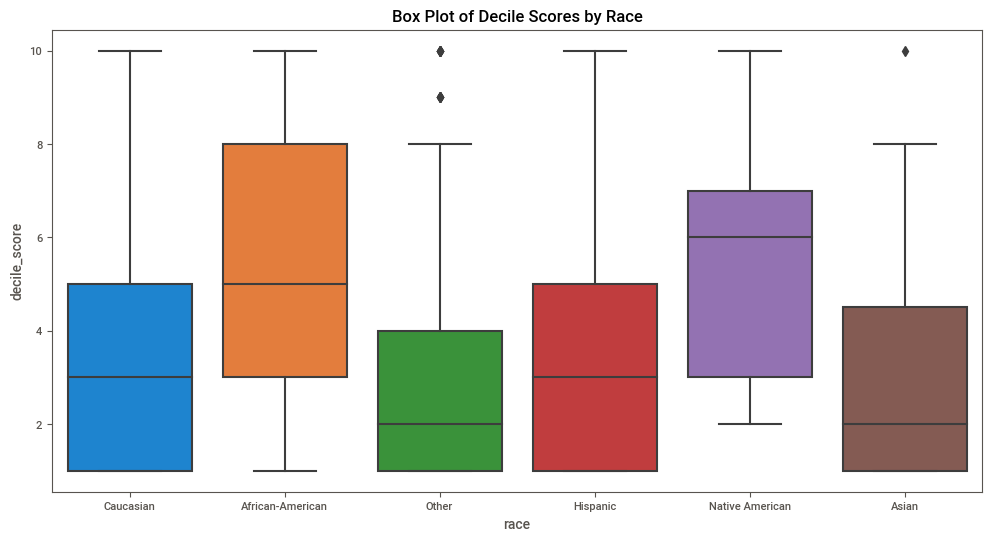

/Users/carmensc/.pyenv/versions/3.10.6/envs/S06_BLU13/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/carmensc/.pyenv/versions/3.10.6/envs/S06_BLU13/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/carmensc/.pyenv/versions/3.10.6/envs/S06_BLU13/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


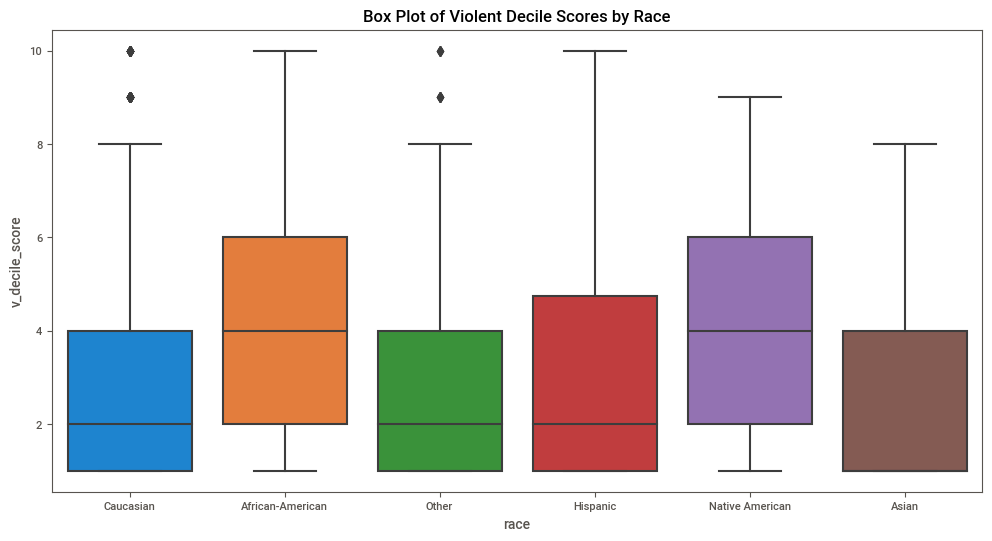

/Users/carmensc/.pyenv/versions/3.10.6/envs/S06_BLU13/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/carmensc/.pyenv/versions/3.10.6/envs/S06_BLU13/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/carmensc/.pyenv/versions/3.10.6/envs/S06_BLU13/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/carmensc/.pyenv/versions/3.10.6/envs/S06_BLU13/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: Fut

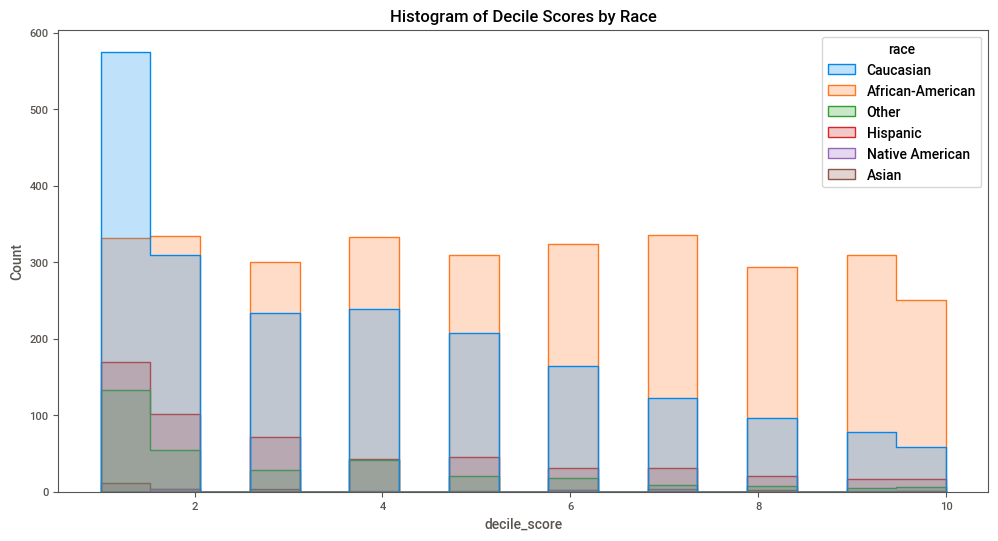

/Users/carmensc/.pyenv/versions/3.10.6/envs/S06_BLU13/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/carmensc/.pyenv/versions/3.10.6/envs/S06_BLU13/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/carmensc/.pyenv/versions/3.10.6/envs/S06_BLU13/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/carmensc/.pyenv/versions/3.10.6/envs/S06_BLU13/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: Fut

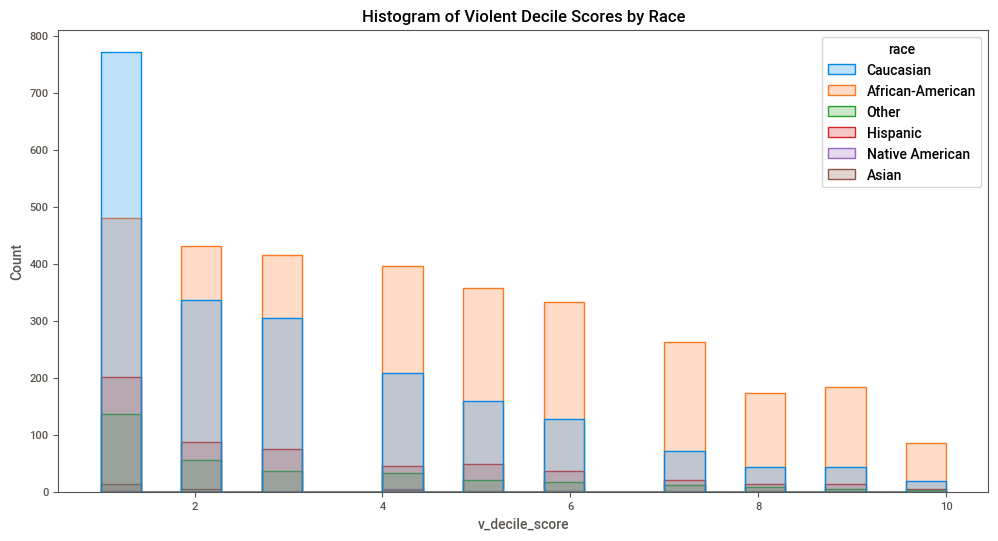

In [28]:


# Assuming 'data' is your DataFrame already loaded

# Box Plots for Decile Scores by Race
plt.figure(figsize=(12, 6))
sns.boxplot(x='race', y='decile_score', data=data)
plt.title('Box Plot of Decile Scores by Race')
plt.show()

# Box Plots for Violent Decile Scores by Race
plt.figure(figsize=(12, 6))
sns.boxplot(x='race', y='v_decile_score', data=data)
plt.title('Box Plot of Violent Decile Scores by Race')
plt.show()

# Histograms for Decile Scores by Race
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='decile_score', hue='race', element='step', stat='count', common_norm=False)
plt.title('Histogram of Decile Scores by Race')
plt.show()

# Histograms for Violent Decile Scores by Race
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='v_decile_score', hue='race', element='step', stat='count', common_norm=False)
plt.title('Histogram of Violent Decile Scores by Race')
plt.show()


Columns after encoding: ['id', 'age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count', 'decile_score', 'v_decile_score', 'is_recid', 'is_violent_recid', 'two_year_recid', 'race_African-American', 'race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Native American', 'race_Other', 'sex_Female', 'sex_Male', 'score_text_High', 'score_text_Low', 'score_text_Medium', 'v_score_text_High', 'v_score_text_Low', 'v_score_text_Medium']


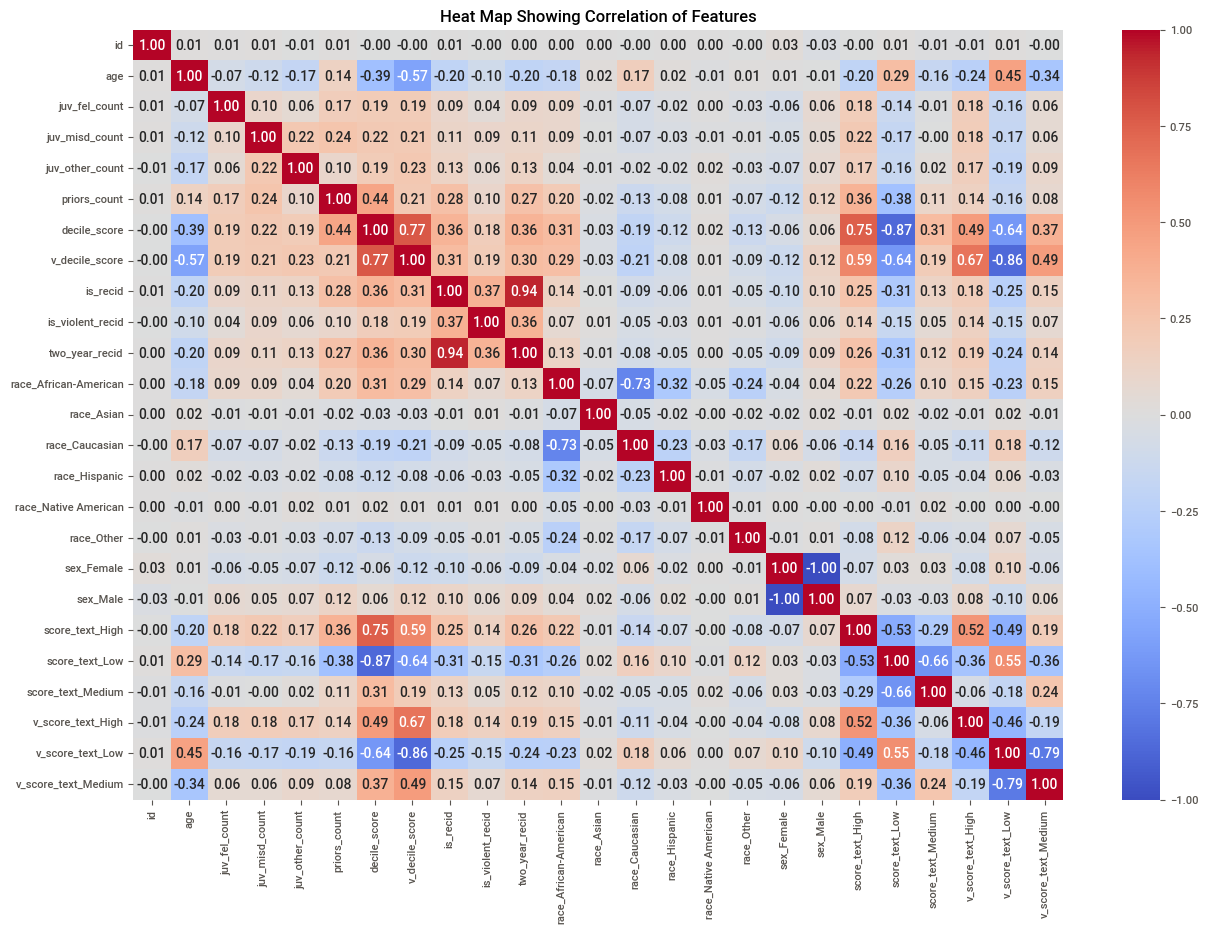

In [36]:


# Select numeric columns and specific categorical columns
numeric_cols = data.select_dtypes(include=[np.number])  # Selects all numeric columns
categorical_cols = data[['race', 'sex', 'score_text', 'v_score_text']]  # Specific categorical columns

# Combine the dataframes
combined_data = pd.concat([numeric_cols, categorical_cols], axis=1)

# One-hot encode the categorical columns, this time explicitly listing them to ensure correctness
data_encoded = pd.get_dummies(combined_data, columns=['race', 'sex', 'score_text', 'v_score_text'], drop_first=False)

# Verify that the new columns have been added (Output for verification)
print("Columns after encoding:", data_encoded.columns.tolist())

# Correlation matrix
corr_matrix = data_encoded.corr()  # Compute correlation matrix on the encoded DataFrame

# Heat map for correlations
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Heat Map Showing Correlation of Features')
plt.show()


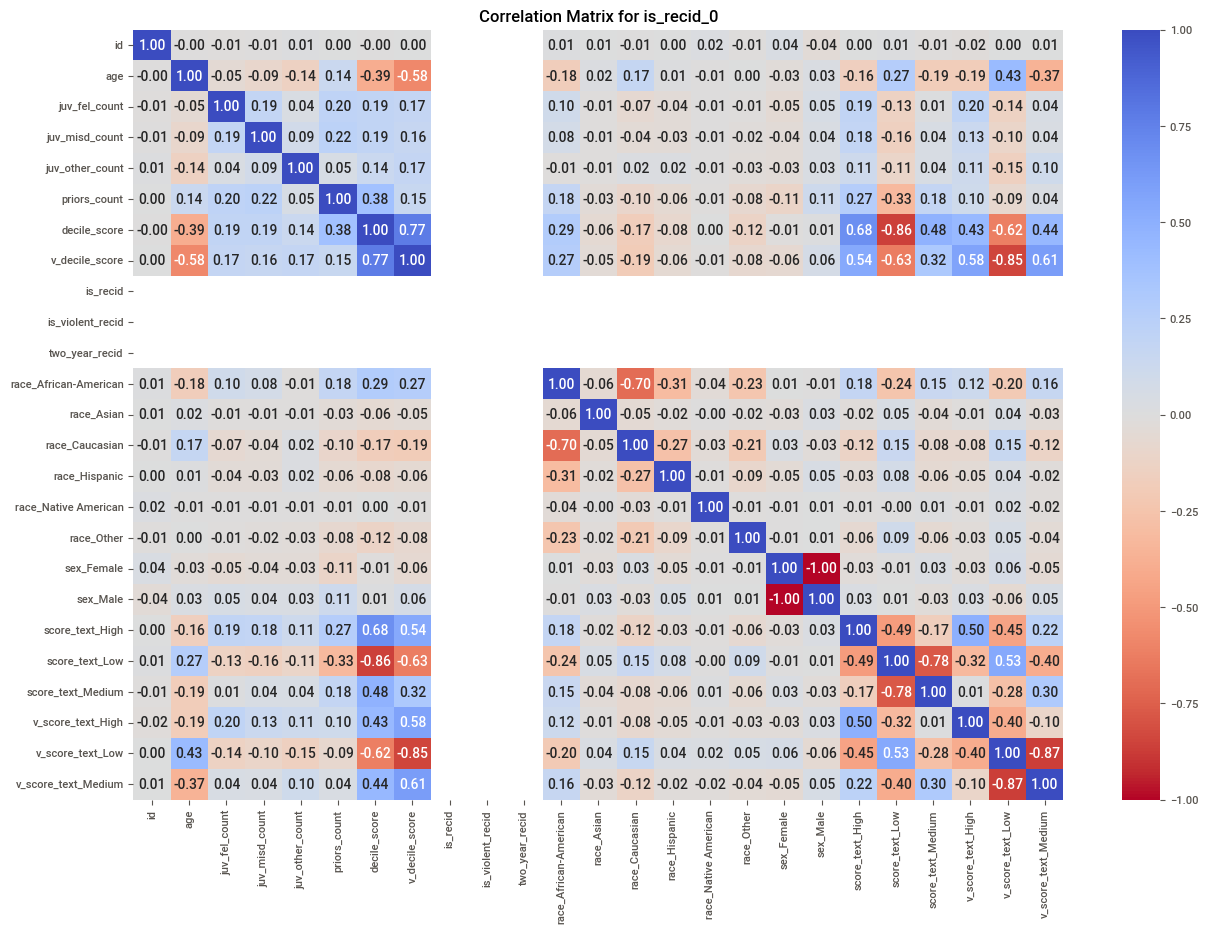

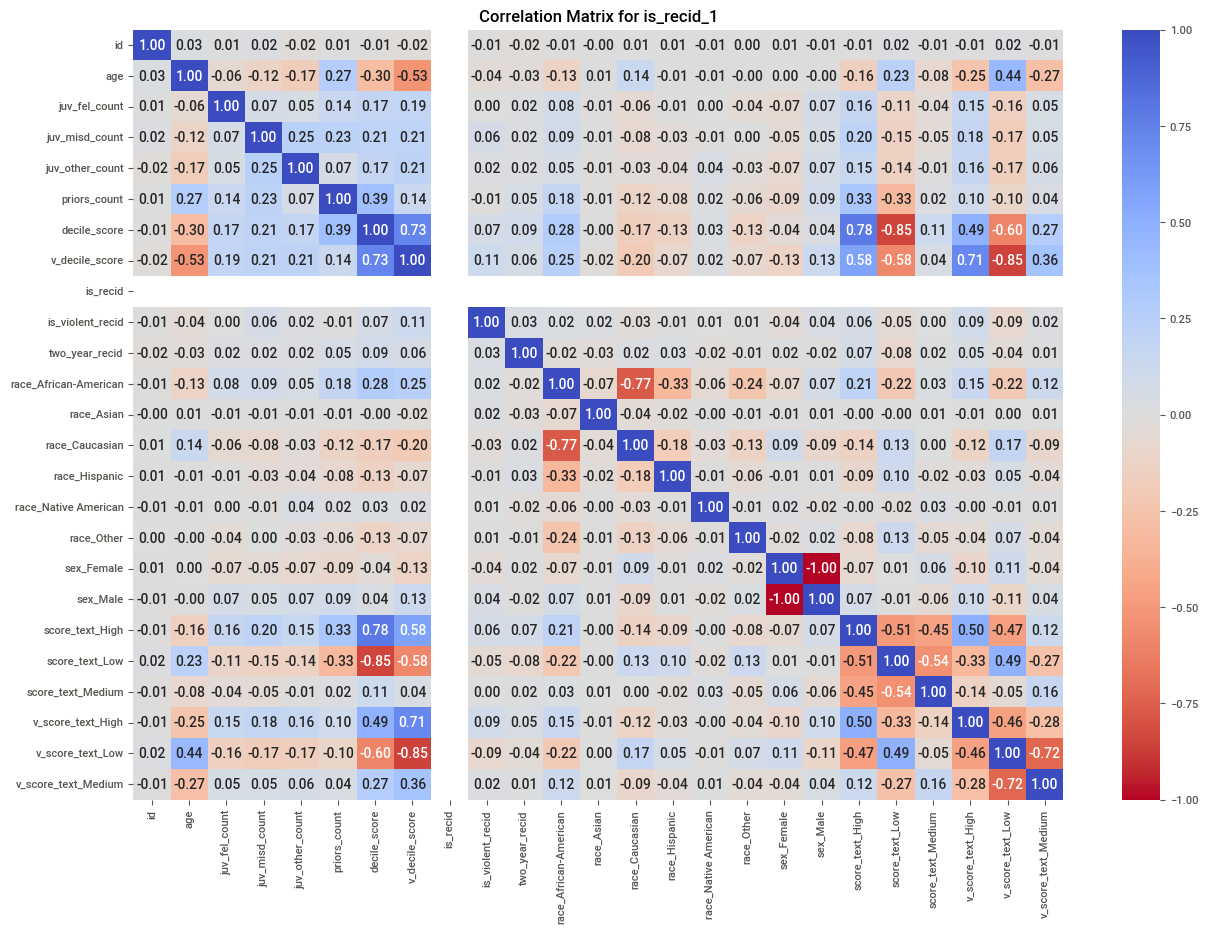

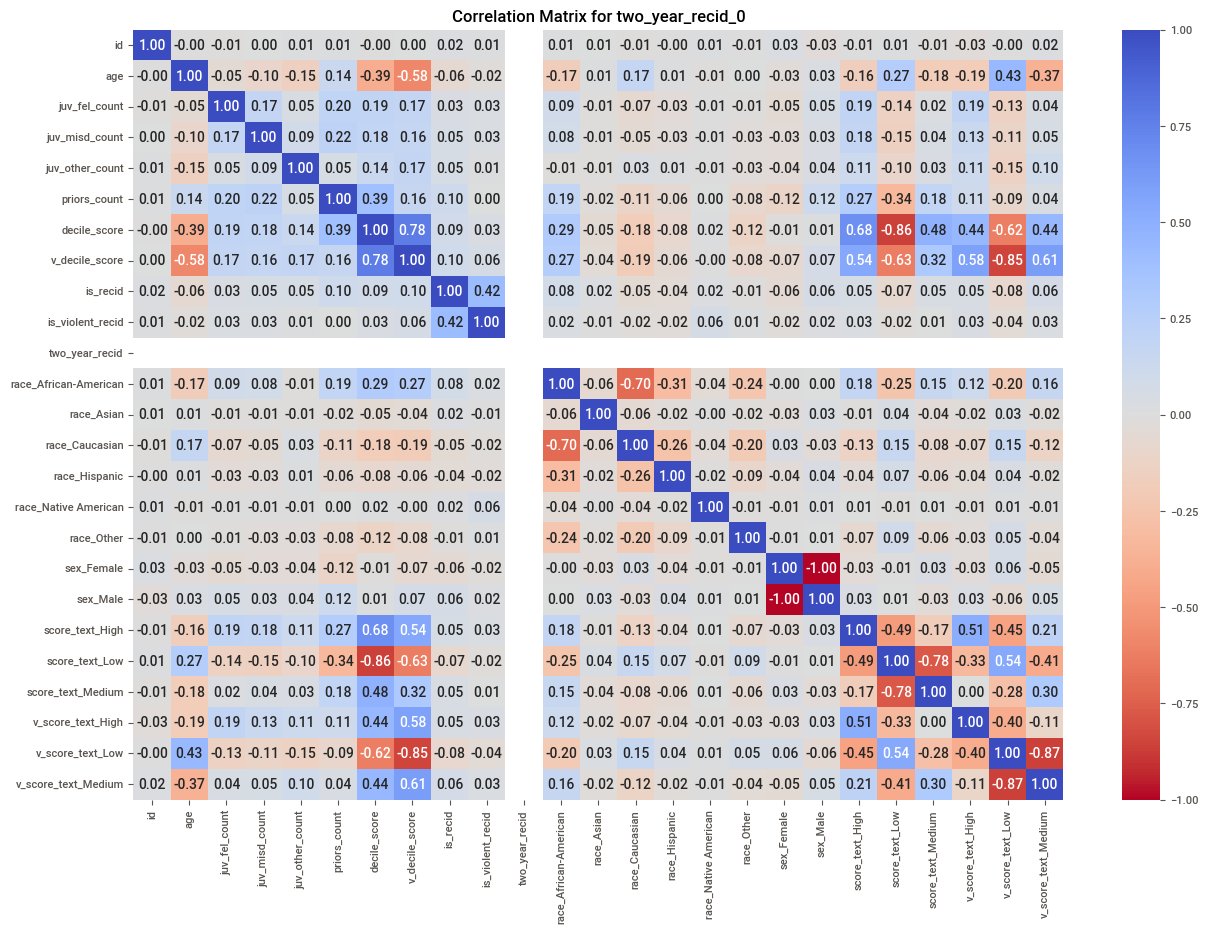

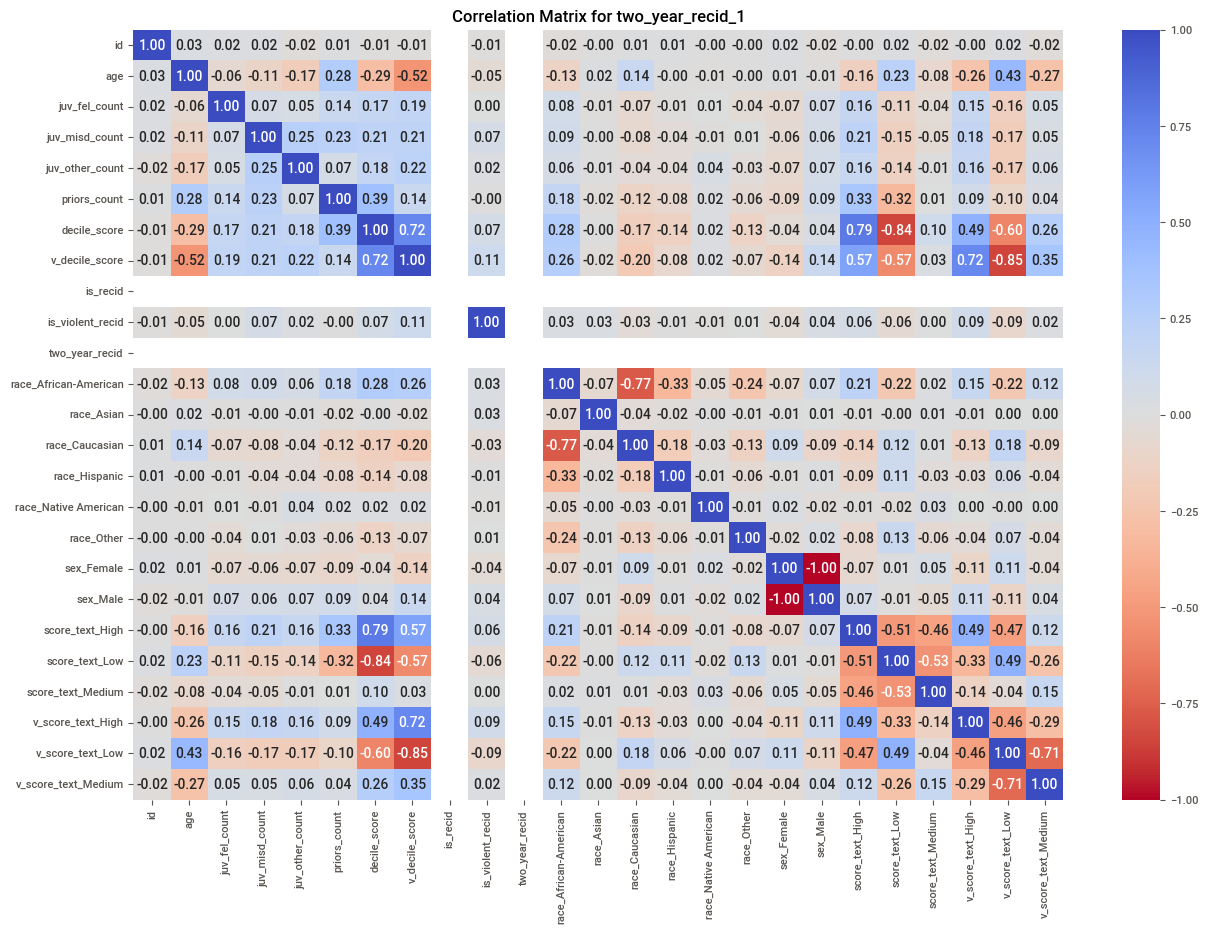

In [38]:

# Define the conditions
conditions = {
    'is_recid_0': data_encoded[data_encoded['is_recid'] == 0],
    'is_recid_1': data_encoded[data_encoded['is_recid'] == 1],
    'two_year_recid_0': data_encoded[data_encoded['two_year_recid'] == 0],
    'two_year_recid_1': data_encoded[data_encoded['two_year_recid'] == 1]
}

# Plotting function to create and show heatmap
def plot_heatmap(df, title):
    plt.figure(figsize=(15, 10))
    corr_matrix = df.corr()  # Compute the correlation matrix
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm_r')
    plt.title(title)
    plt.show()

# Generate and plot correlation matrices for each condition
for key, subset in conditions.items():
    plot_heatmap(subset, f'Correlation Matrix for {key}')


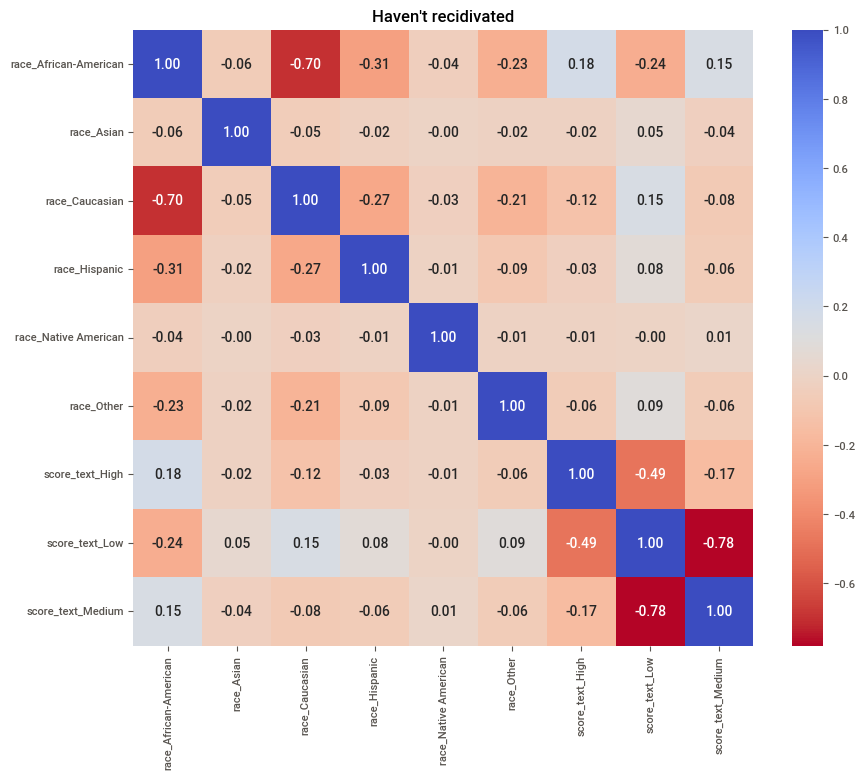

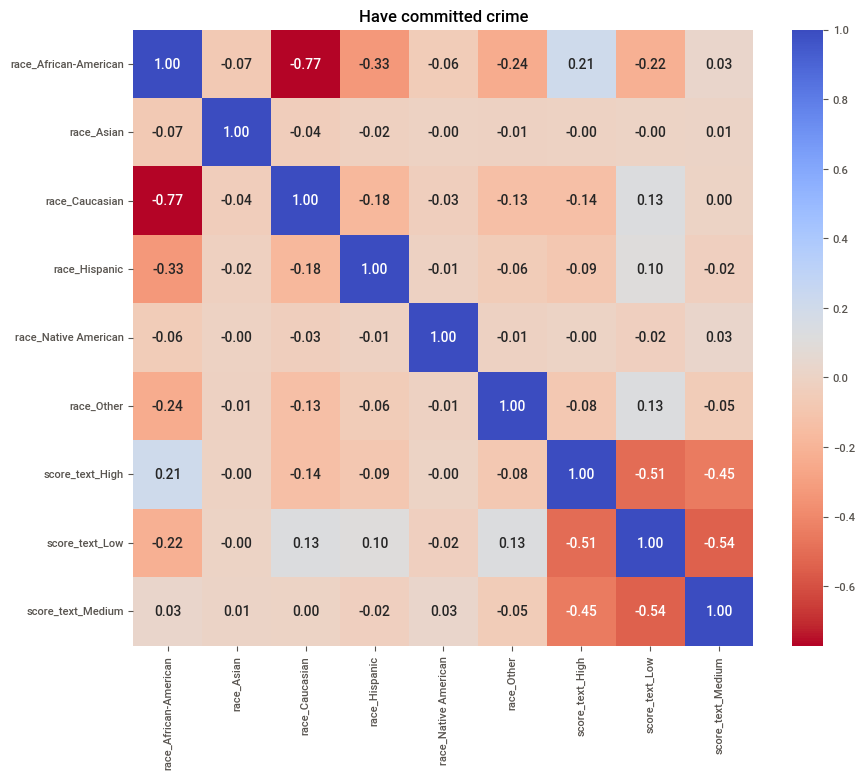

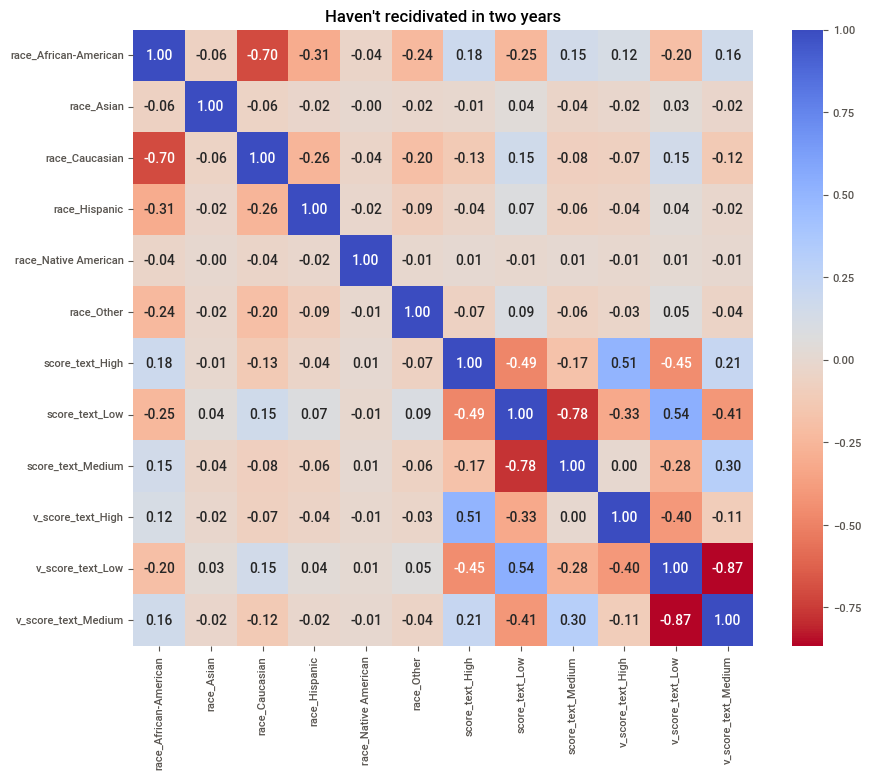

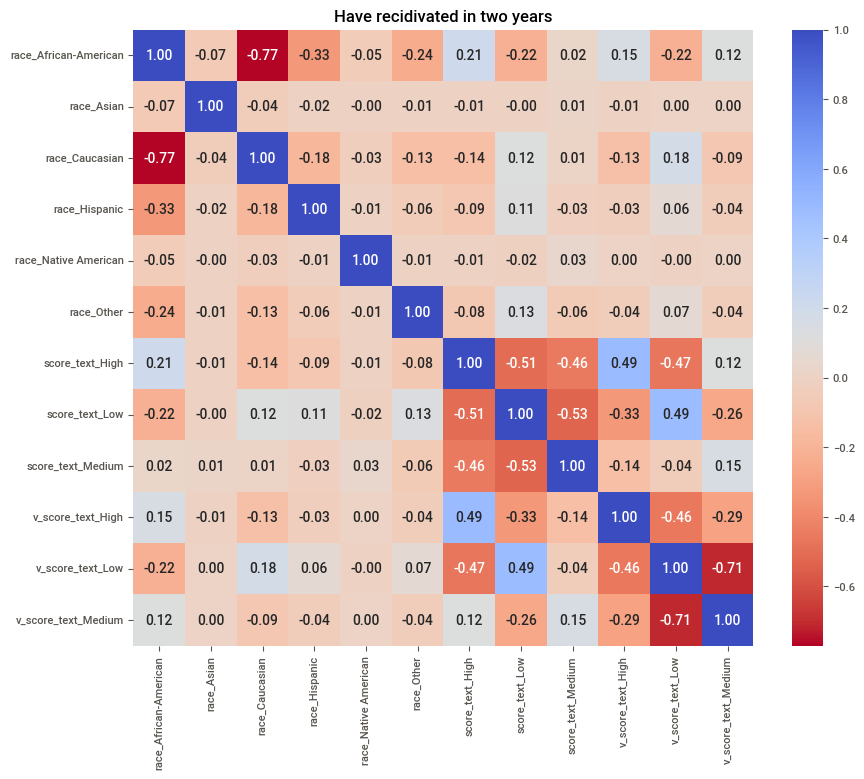

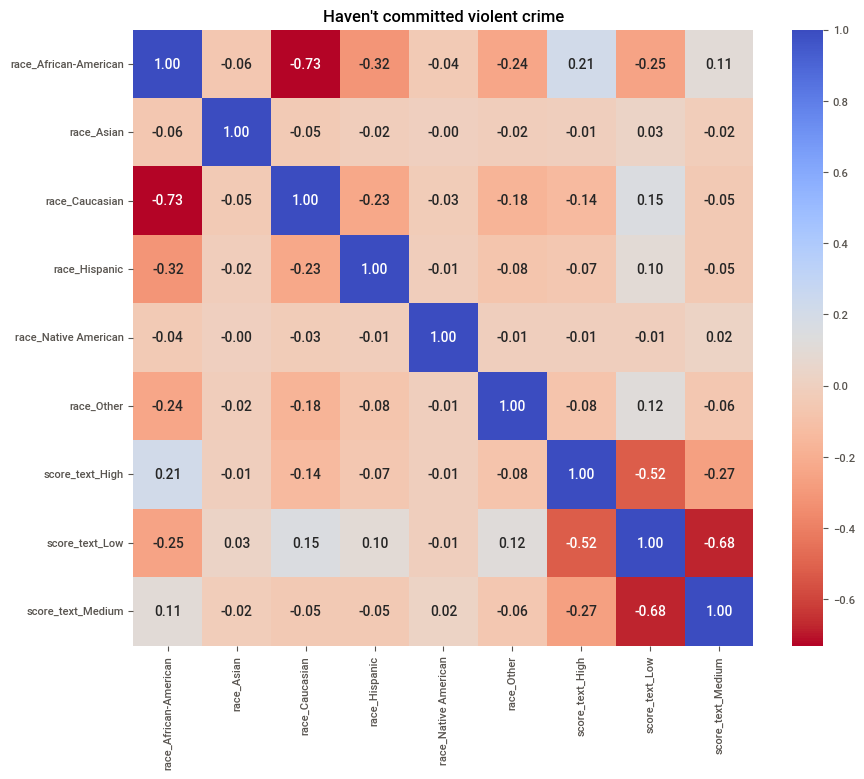

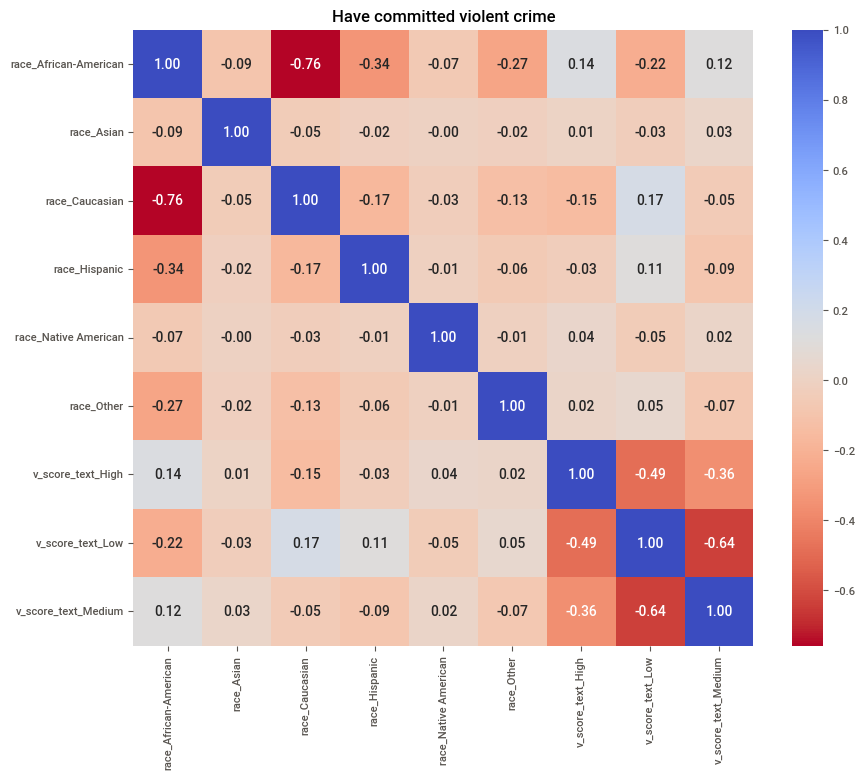

In [39]:

# Assuming 'data_encoded' is already loaded and includes all necessary columns

# Function to filter columns based on prefixes
def filter_columns(df, prefixes):
    return df[[col for col in df if any(col.startswith(prefix) for prefix in prefixes)]]

# Define the conditions and column filters
conditions = {
    'Haven\'t recidivated': (data_encoded[data_encoded['is_recid'] == 0], ['race_', 'score_text']),
    'Have committed crime': (data_encoded[data_encoded['is_recid'] == 1], ['race_', 'score_text']),
    'Haven\'t recidivated in two years': (data_encoded[data_encoded['two_year_recid'] == 0], ['race_', 'score_text', 'v_score_text']),
    'Have recidivated in two years': (data_encoded[data_encoded['two_year_recid'] == 1], ['race_', 'score_text', 'v_score_text']),
    'Haven\'t committed violent crime': (data_encoded[data_encoded['is_violent_recid'] == 0], ['race_', 'score_text']),
    'Have committed violent crime': (data_encoded[data_encoded['is_violent_recid'] == 1], ['race_', 'v_score_text'])
}

# Plotting function to create and show heatmap
def plot_heatmap(df, title, prefixes):
    filtered_df = filter_columns(df, prefixes)
    corr_matrix = filtered_df.corr()  # Compute the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm_r')
    plt.title(title)
    plt.show()

# Generate and plot correlation matrices for each condition
for title, (subset, prefixes) in conditions.items():
    plot_heatmap(subset, title, prefixes)


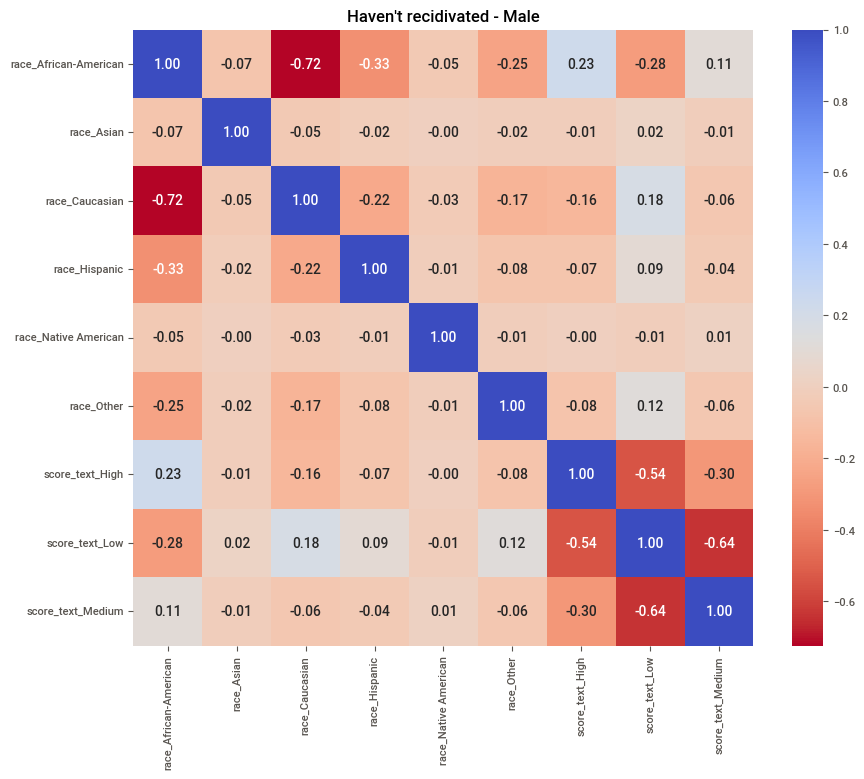

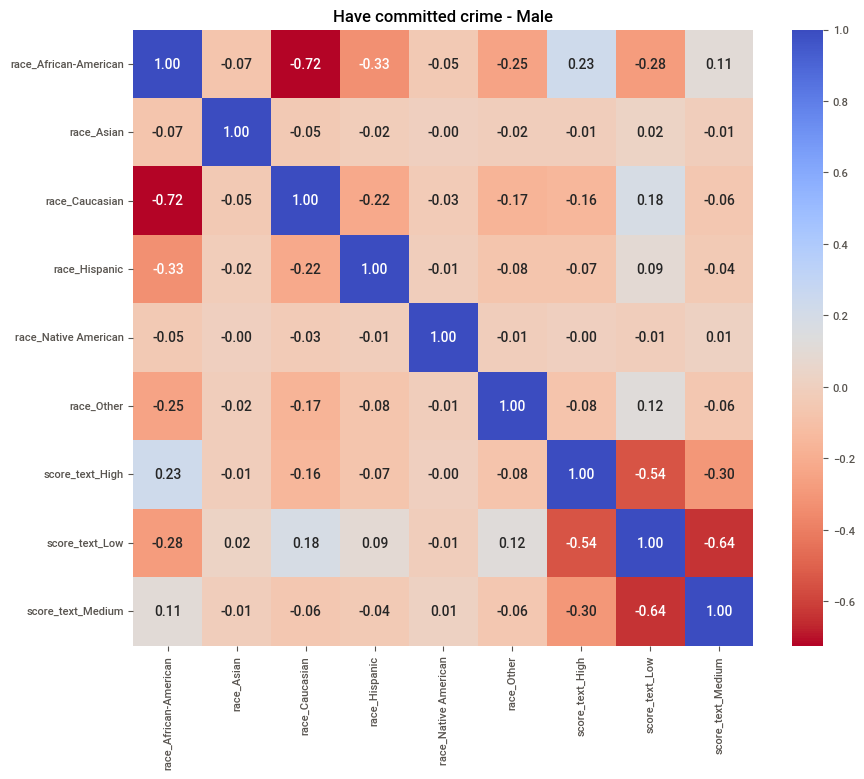

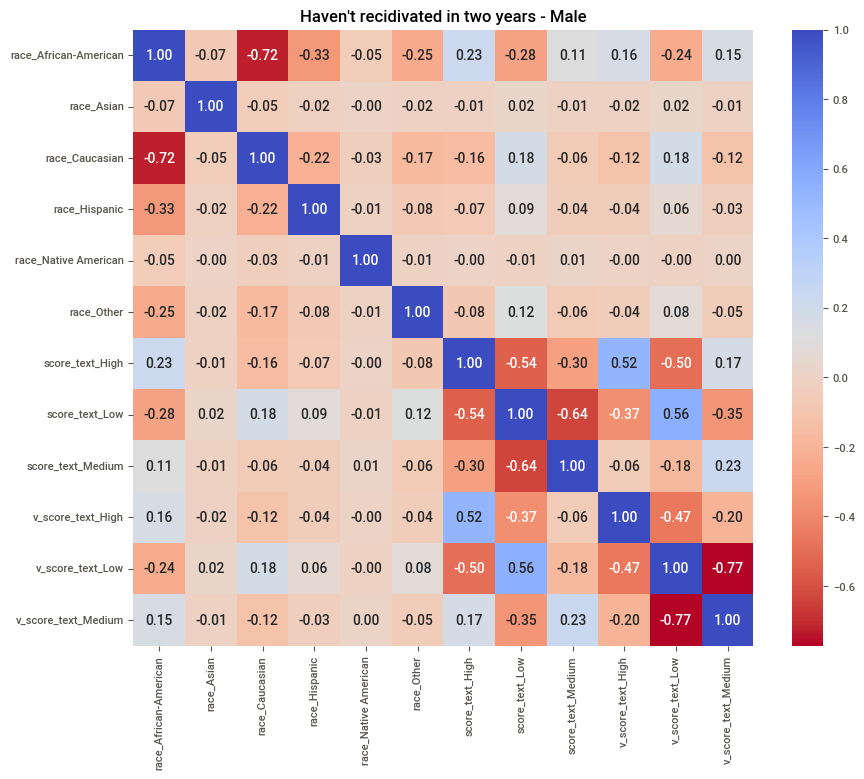

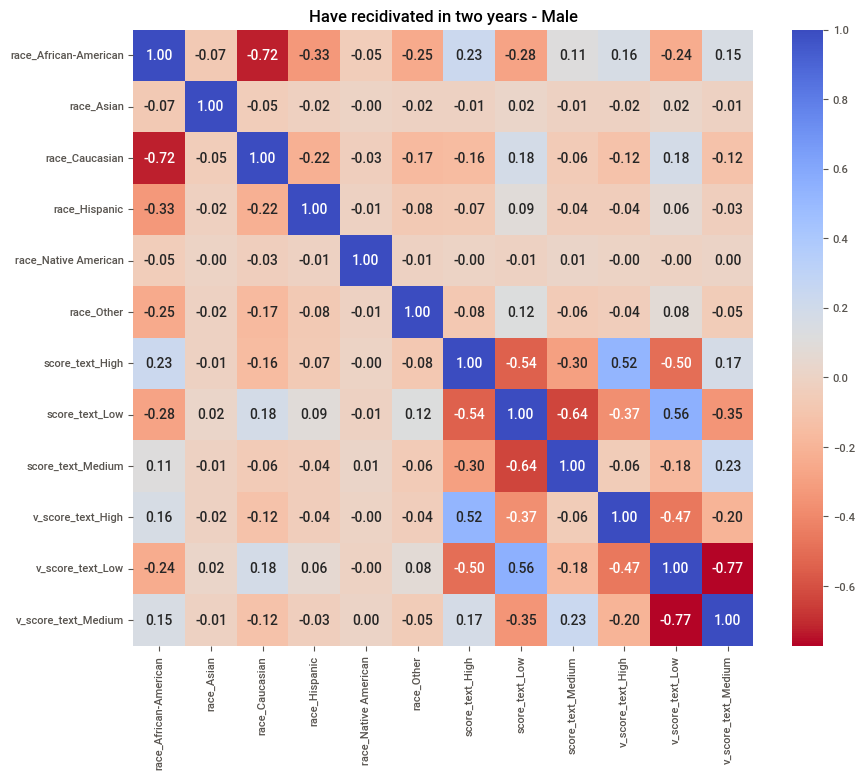

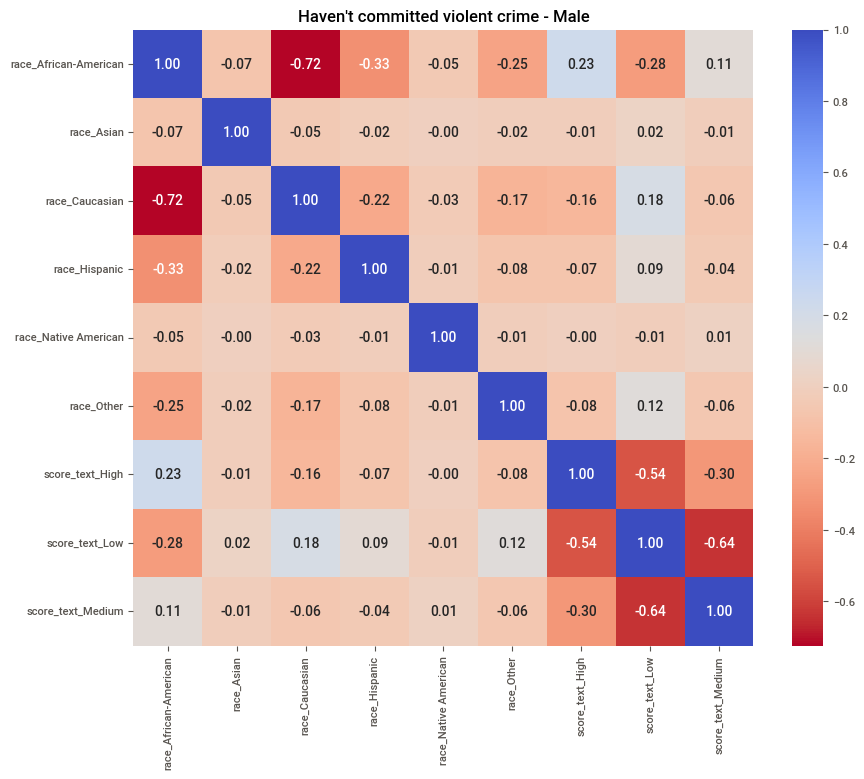

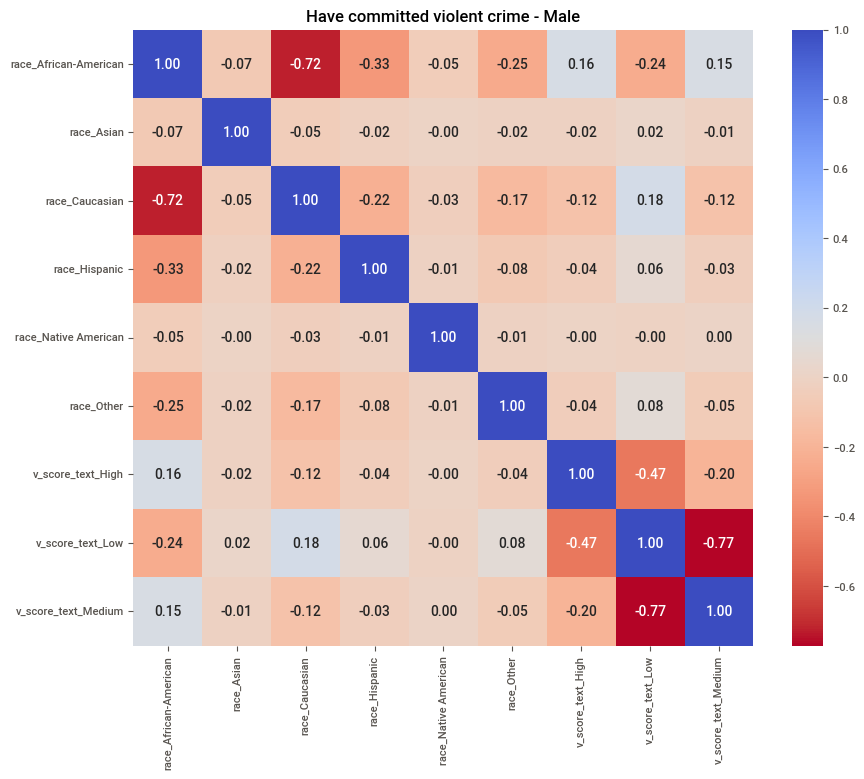

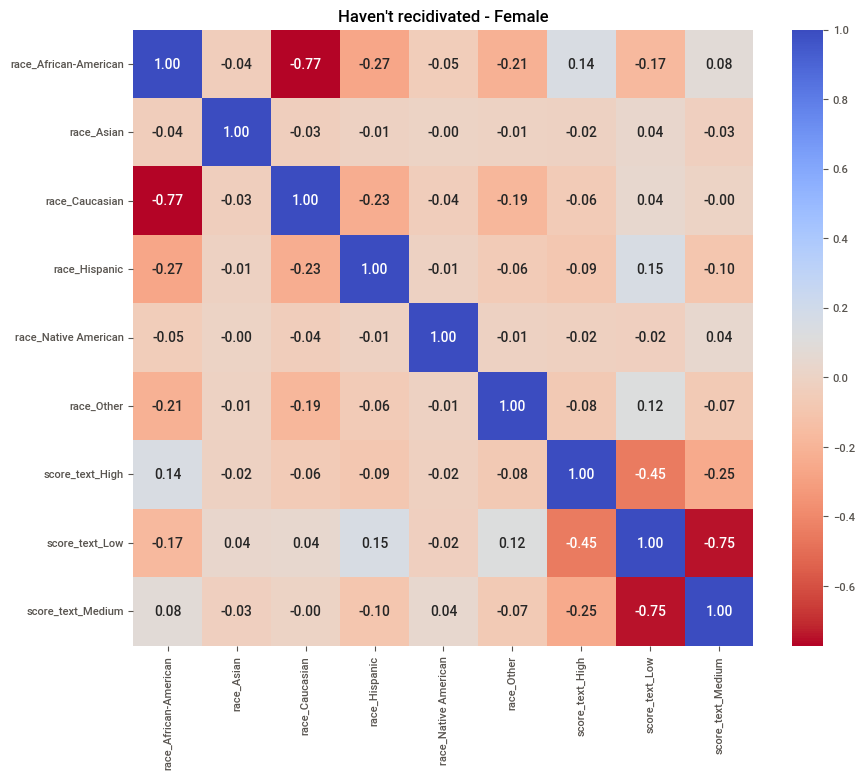

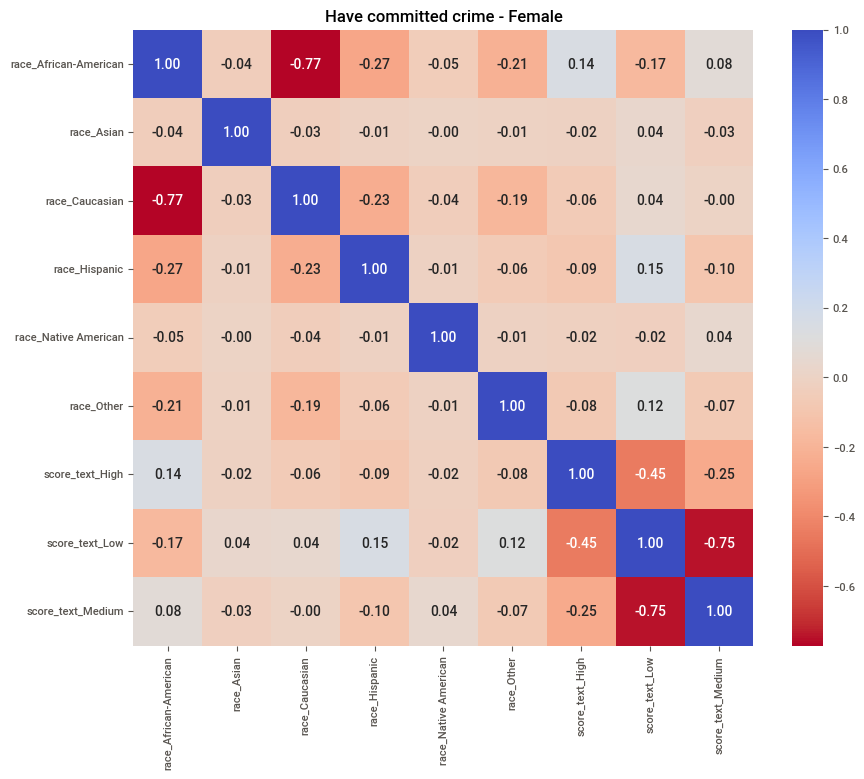

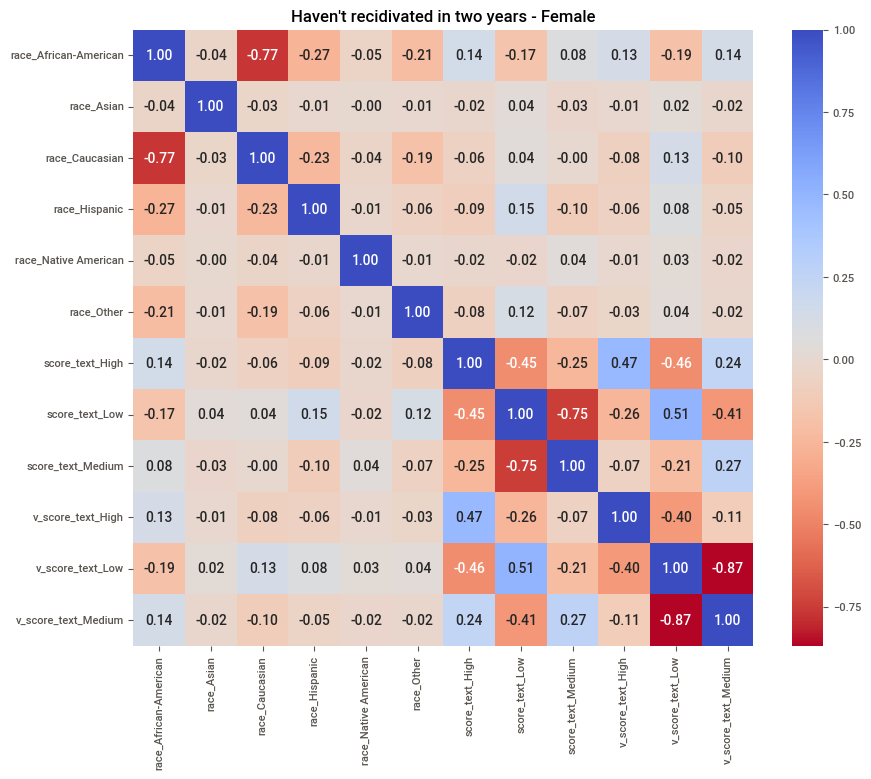

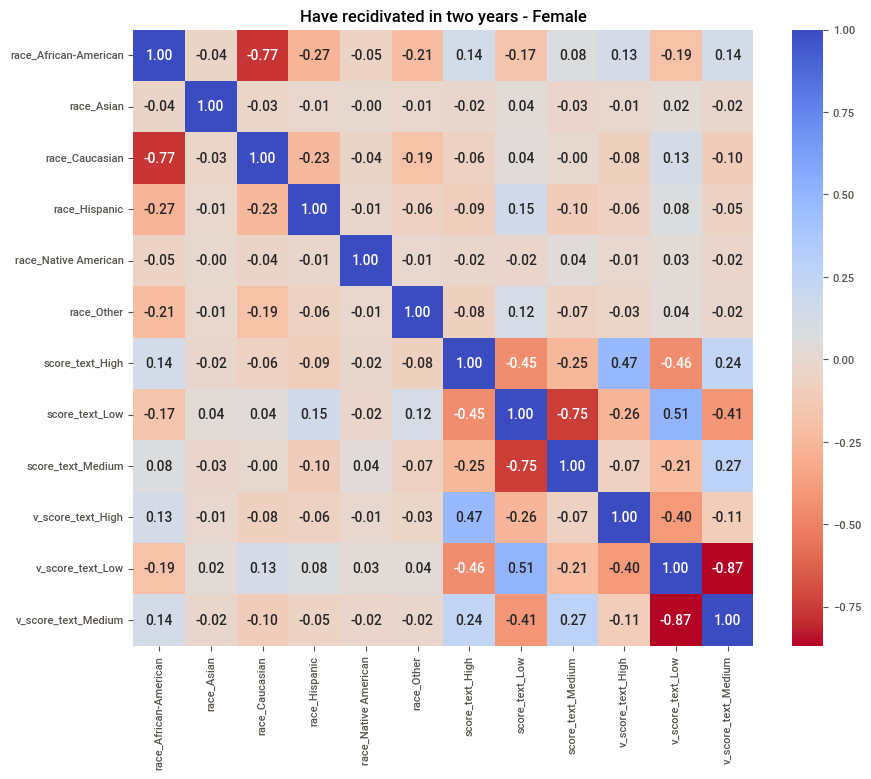

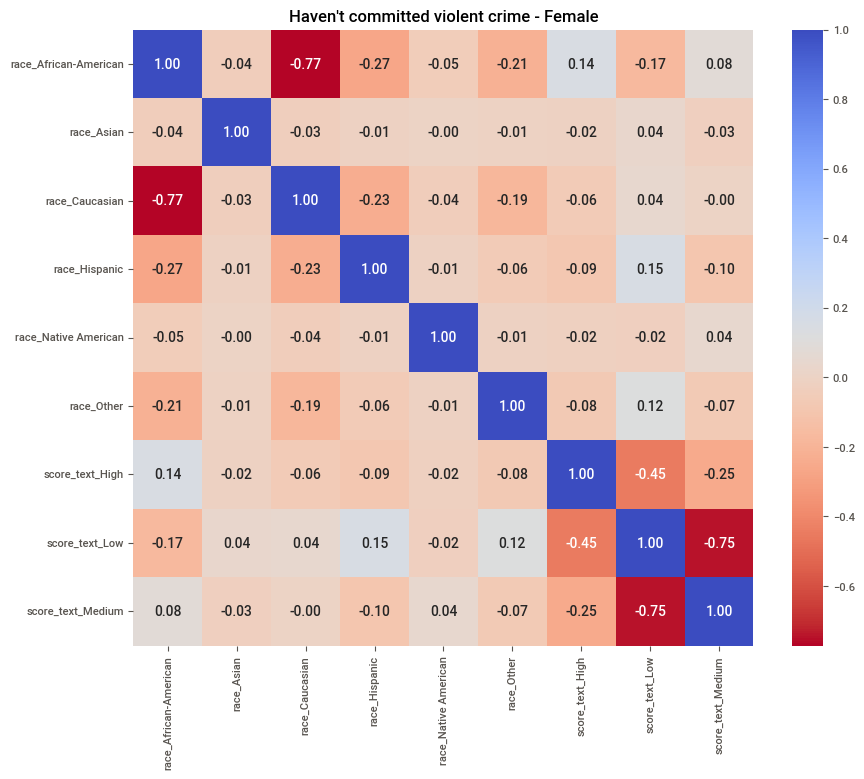

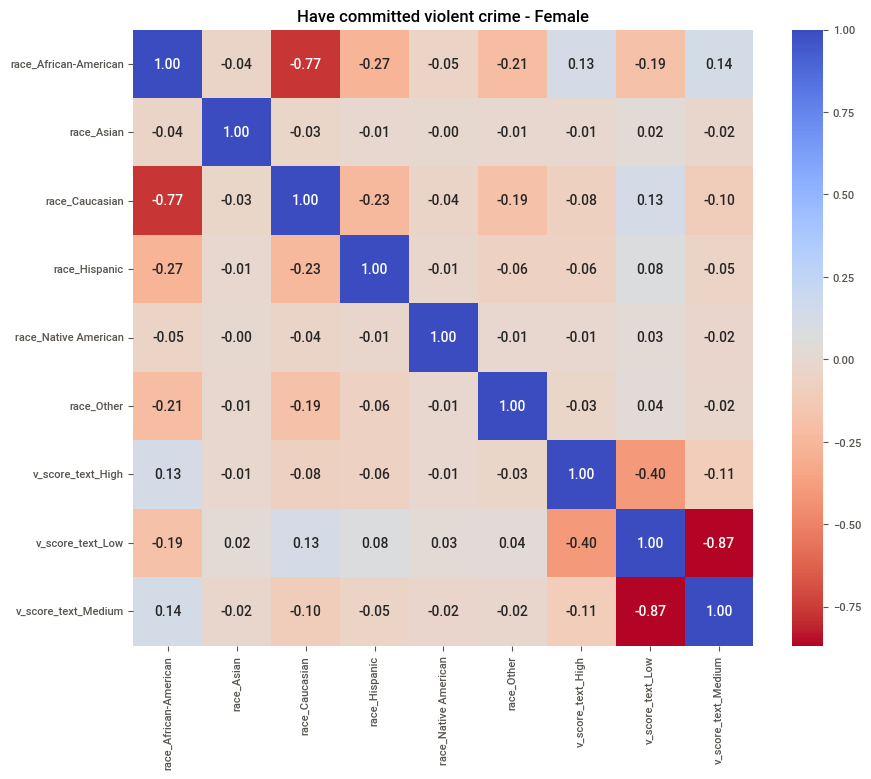

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data_encoded' is already loaded and includes all necessary columns

# Function to filter columns based on prefixes
def filter_columns(df, prefixes):
    return df[[col for col in df if any(col.startswith(prefix) for prefix in prefixes)]]

# Define the conditions and column filters, updated to iterate over sex
conditions = {
    "Haven't recidivated": ['race_', 'score_text'],
    "Have committed crime": ['race_', 'score_text'],
    "Haven't recidivated in two years": ['race_', 'score_text', 'v_score_text'],
    "Have recidivated in two years": ['race_', 'score_text', 'v_score_text'],
    "Haven't committed violent crime": ['race_', 'score_text'],
    "Have committed violent crime": ['race_', 'v_score_text']
}

sex_values = ['Male', 'Female']

# Plotting function to create and show heatmap
def plot_heatmap(df, title, prefixes):
    filtered_df = filter_columns(df, prefixes)
    corr_matrix = filtered_df.corr()  # Compute the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm_r')
    plt.title(title)
    plt.show()

# Generate and plot correlation matrices for each condition and each sex
for sex in sex_values:
    for condition, prefixes in conditions.items():
        title = f"{condition} - {sex}"
        subset = data_encoded[(data_encoded['sex_' + sex] == 1)]  # Update this if column names for sex are different
        plot_heatmap(subset, title, prefixes)


# Sttistical analysis

In [42]:

# Assuming 'data' is your DataFrame and it includes 'race' and 'risk_level' (scores) columns
# risk_level is assumed to be binary encoded as 'High' and 'Low'

# Create a contingency table
contingency_table = pd.crosstab(data['race'], data['score_text_High'])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results of the Chi-Square Test
print("\nChi-Square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)
print("Expected Frequencies:")
print(expected)

# Interpret the results
if p < 0.05:
    print("\nThere is a statistically significant difference between races being labeled high risk or low risk.")
else:
    print("\nThere is no statistically significant difference between races being labeled high risk or low risk.")


KeyError: 'score_text_High'